In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from os import path
from modules.SoundsDatabase import SoundsDatabase
from modules.SoundFeatureExtractor import  SoundFeatureExtractor
from modules import NetworksPlotUtils
import time
import numpy as np
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as K

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
pickle_path = "./pickle.repo/data.features.v1.pickle"
pickle_data = pickle.load( open( pickle_path, "rb" ))

ids    = pickle_data["ids"]
pre_data   = pickle_data["data"]
labels = pickle_data["labels"]

In [4]:
soundsDB = SoundsDatabase("./data/train.csv", "./data/audio.files")

## Data preprocessing

- **Vectorize the labels**

In [5]:
print(labels)

['siren', 'street_music', 'drilling', 'siren', 'dog_bark', 'children_playing', 'street_music', 'drilling', 'gun_shot', 'dog_bark', 'engine_idling', 'siren', 'gun_shot', 'engine_idling', 'air_conditioner', 'air_conditioner', 'engine_idling', 'siren', 'children_playing', 'jackhammer', 'gun_shot', 'siren', 'jackhammer', 'street_music', 'jackhammer', 'engine_idling', 'siren', 'children_playing', 'jackhammer', 'engine_idling', 'air_conditioner', 'car_horn', 'drilling', 'siren', 'gun_shot', 'children_playing', 'children_playing', 'drilling', 'gun_shot', 'siren', 'car_horn', 'drilling', 'street_music', 'jackhammer', 'children_playing', 'dog_bark', 'dog_bark', 'street_music', 'street_music', 'jackhammer', 'air_conditioner', 'dog_bark', 'jackhammer', 'gun_shot', 'jackhammer', 'street_music', 'car_horn', 'street_music', 'children_playing', 'car_horn', 'siren', 'jackhammer', 'siren', 'street_music', 'dog_bark', 'jackhammer', 'air_conditioner', 'drilling', 'air_conditioner', 'jackhammer', 'street_

In [6]:
labelEncoder = preprocessing.LabelBinarizer()
labelEncoder.fit(labels)
labels = labelEncoder.transform(labels)

In [7]:
labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [15]:
labelEncoder.inverse_transform(np.array([[0,0,0,0,0,0,0,0,0,1]]))

array(['street_music'], dtype='<U16')

- Only will use the average metrics of features

In [8]:
pre_data

[{'zcr': {'avg': 0.04443359375, 'sum': 15.32958984375},
  'freq_centr': {'avg': 912.5982952841669, 'sum': 314846.4118730376},
  'spec_rol': {'avg': 3407.1768851902175, 'sum': 1175476.025390625},
  'mfccs': {'avg': array([-158.25395203,  204.53372192,  -64.29319   ,   37.00553894,
           -23.07886124,   22.84785461,   -1.28541803,    3.02474236,
            11.56956863,    2.43588257,    8.13450909,    4.00376844,
             6.76897907,    0.49065259,    4.63476562,   -2.49732447,
             1.1626451 ,   -3.21206546,   -1.89577579,   -3.98908877]),
   'sum': array([-54597.61328125,  70564.1328125 , -22181.15039062,  12766.91113281,
           -7962.20703125,   7882.50976562,   -443.46923828,   1043.53613281,
            3991.5012207 ,    840.3795166 ,   2806.40576172,   1381.30004883,
            2335.29785156,    169.27514648,   1598.99414062,   -861.5769043 ,
             401.11254883,  -1108.16259766,   -654.04266357,  -1376.2355957 ])}},
 {'zcr': {'avg': 0.0440933552194149,

In [9]:
def flatten(lis):
    new_list = list()
    for item in lis:
        if isinstance(item, np.ndarray):
            new_list = new_list + list(item)
        else:        
            new_list.append(item)
    return new_list

In [10]:
nr_features = len(flatten([metric_values["avg"] for metric_name, metric_values in pre_data[0].items()]))

In [11]:
data = np.zeros((len(pre_data), nr_features))
for i in range(len(soundsDB)):
    data[i] = flatten([metric_values["avg"] for metric_name, metric_values in pre_data[i].items()])

In [12]:
data

array([[ 4.44335938e-02,  9.12598295e+02,  3.40717689e+03, ...,
        -3.21206546e+00, -1.89577579e+00, -3.98908877e+00],
       [ 4.40933552e-02,  9.95034353e+02,  4.40543966e+03, ...,
        -7.43021154e+00,  1.44715750e+00, -6.95875597e+00],
       [ 2.12941576e-01,  2.69124667e+03,  9.80859248e+03, ...,
        -5.96402502e+00,  3.95765471e+00, -1.49883862e+01],
       ...,
       [ 2.06594914e-01,  3.44740865e+03,  1.51275349e+04, ...,
         5.65725756e+00, -2.32901931e+00,  1.43719673e+00],
       [ 1.92299701e-02,  8.00728401e+02,  3.30044880e+03, ...,
         2.76927972e+00,  5.96285248e+00,  3.78801703e-01],
       [ 1.19437840e-02,  2.62707511e+02,  9.58445992e+02, ...,
         3.71496940e+00,  6.21515512e+00,  4.84674692e+00]])

In [13]:
labels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [14]:
labels.shape

(5435, 10)

### Data normalization

In [15]:
data.shape

(5435, 23)

In [16]:
input_normalization_layer = K.layers.experimental.preprocessing.Normalization()
input_normalization_layer.adapt(data)
normalized_data = input_normalization_layer(data)
normalized_data

<tf.Tensor: shape=(5435, 23), dtype=float32, numpy=
array([[-0.38210398, -0.5213515 , -0.54459554, ..., -0.69093543,
        -0.33252755, -0.80513597],
       [-0.3872459 , -0.4185654 , -0.25941777, ..., -1.4290276 ,
         0.23895487, -1.3211073 ],
       [ 2.1645064 ,  1.6963705 ,  1.2841233 , ..., -1.1724738 ,
         0.66813034, -2.716233  ],
       ...,
       [ 2.0685914 ,  2.6391973 ,  2.8036077 , ...,  0.86102045,
        -0.40659153,  0.1376659 ],
       [-0.76299876, -0.66083735, -0.57508504, ...,  0.35568154,
         1.0109237 , -0.04622726],
       [-0.87311274, -1.331673  , -1.2441347 , ...,  0.5211585 ,
         1.0540555 ,  0.73006564]], dtype=float32)>

## Split Dataset

- Train Dataset     -> 60%
- Validate Dataset -> 20%
- Test Dataset     -> 20%

In [17]:
x_train, x_val_test, y_train, y_val_test = train_test_split(data, labels, test_size=0.4, random_state=69)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=69)

In [18]:
len_datasets = [len(dataset) for dataset in [x_train, x_val, x_test]]

/home/pficardoso/anaconda3/envs/urban.sound.classification/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


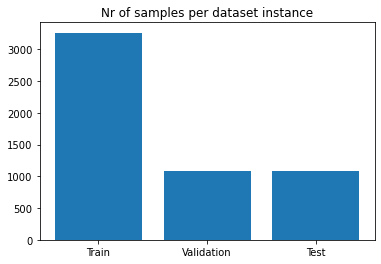

In [19]:
fig1, ax1 = plt.subplots()
ax1.bar(np.arange(3), len_datasets)
ax1.set_title("Nr of samples per dataset instance")
ax1.set_xticks(np.arange(3))
ax1.set_xticklabels(['Train', 'Validation', 'Test'])
fig1.show()

## Networks 

In [82]:
my_models = list()

my_models.append(K.models.Sequential())

my_models[0].add(input_normalization_layer)
my_models[0].add(K.layers.Dense(128, activation='relu', input_shape=(data.shape[1],)))
my_models[0].add(K.layers.Dense(64, activation='relu',))
my_models[0].add(K.layers.Dense(64, activation='relu'))
my_models[0].add(K.layers.Dense(32, activation='relu'))
my_models[0].add(K.layers.Dense(labels.shape[1], activation='softmax'))

my_models.append(K.models.Sequential())
my_models[1].add(input_normalization_layer)
my_models[1].add(K.layers.Dense(64, activation='relu', input_shape=(data.shape[1],)))
my_models[1].add(K.layers.Dense(64, activation='relu'))
my_models[1].add(K.layers.Dense(32, activation='relu'))
my_models[1].add(K.layers.Dense(labels.shape[1], activation='softmax'))


my_models.append(K.models.Sequential())
my_models[2].add(input_normalization_layer)
my_models[2].add(K.layers.Dense(256, activation='relu', input_shape=(data.shape[1],)))
my_models[2].add(K.layers.Dense(128, activation='relu'))
my_models[2].add(K.layers.Dense(64, activation='relu'))
my_models[2].add(K.layers.Dense(64, activation='relu'))
my_models[2].add(K.layers.Dense(32, activation='relu'))
my_models[2].add(K.layers.Dense(labels.shape[1], activation='softmax'))

models_history = list()
for model in my_models:
    print(model)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    
    models_history.append(model.fit(x_train, 
                                    y_train, 
                                    batch_size=512, 
                                    epochs = 1000,
                                    validation_data=(x_val, y_val)))

Epoch 1/1000
7/7 [==============================] - 0s 47ms/step - loss: 2.1902 - accuracy: 0.1932 - val_loss: 2.0821 - val_accuracy: 0.3045
Epoch 2/1000
7/7 [==============================] - 0s 19ms/step - loss: 1.9706 - accuracy: 0.3594 - val_loss: 1.8927 - val_accuracy: 0.3891
Epoch 3/1000
7/7 [==============================] - 0s 13ms/step - loss: 1.7610 - accuracy: 0.4367 - val_loss: 1.6899 - val_accuracy: 0.4131
Epoch 4/1000
7/7 [==============================] - 0s 16ms/step - loss: 1.5584 - accuracy: 0.5133 - val_loss: 1.5068 - val_accuracy: 0.5437
Epoch 5/1000
7/7 [==============================] - 0s 12ms/step - loss: 1.4023 - accuracy: 0.5747 - val_loss: 1.3716 - val_accuracy: 0.5557
Epoch 6/1000
7/7 [==============================] - 0s 14ms/step - loss: 1.2762 - accuracy: 0.6112 - val_loss: 1.2782 - val_accuracy: 0.5906
Epoch 7/1000
7/7 [==============================] - 0s 18ms/step - loss: 1.1740 - accuracy: 0.6406 - val_loss: 1.1986 - val_accuracy: 0.6182
Epoch 8/1000


Epoch 116/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0481 - accuracy: 0.9914 - val_loss: 0.4489 - val_accuracy: 0.8951
Epoch 117/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0415 - accuracy: 0.9920 - val_loss: 0.4286 - val_accuracy: 0.8868
Epoch 118/1000
7/7 [==============================] - 0s 28ms/step - loss: 0.0719 - accuracy: 0.9798 - val_loss: 0.4282 - val_accuracy: 0.8822
Epoch 119/1000
7/7 [==============================] - 0s 30ms/step - loss: 0.0312 - accuracy: 0.9957 - val_loss: 0.3991 - val_accuracy: 0.8933
Epoch 120/1000
7/7 [==============================] - 0s 27ms/step - loss: 0.0293 - accuracy: 0.9948 - val_loss: 0.4135 - val_accuracy: 0.8896
Epoch 121/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.0657 - accuracy: 0.9825 - val_loss: 0.4655 - val_accuracy: 0.8896
Epoch 122/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0297 - accuracy: 0.9951 - val_loss: 0.4153 - val_accuracy: 0.8988

7/7 [==============================] - 0s 20ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.6494 - val_accuracy: 0.8859
Epoch 231/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0077 - accuracy: 0.9991 - val_loss: 0.5742 - val_accuracy: 0.8997
Epoch 232/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.5803 - val_accuracy: 0.8970
Epoch 233/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.5697 - val_accuracy: 0.9034
Epoch 234/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.5626 - val_accuracy: 0.8988
Epoch 235/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0506 - accuracy: 0.9865 - val_loss: 0.7500 - val_accuracy: 0.8740
Epoch 236/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 0.5810 - val_accuracy: 0.9025
Epoch 237/1000

7/7 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.6641 - val_accuracy: 0.9016
Epoch 345/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.6684 - val_accuracy: 0.9025
Epoch 346/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.6698 - val_accuracy: 0.8988
Epoch 347/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.6799 - val_accuracy: 0.8979
Epoch 348/1000
7/7 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.7173 - val_accuracy: 0.8970
Epoch 349/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.6689 - val_accuracy: 0.8979
Epoch 350/1000
7/7 [==============================] - 0s 49ms/step - loss: 9.1534e-04 - accuracy: 0.9994 - val_loss: 0.6778 - val_accuracy: 0.9034
Epoch 351/

7/7 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.7484 - val_accuracy: 0.9006
Epoch 459/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.8465 - val_accuracy: 0.8850
Epoch 460/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0215 - accuracy: 0.9954 - val_loss: 0.7387 - val_accuracy: 0.9016
Epoch 461/1000
7/7 [==============================] - 0s 39ms/step - loss: 5.5601e-04 - accuracy: 0.9997 - val_loss: 0.7385 - val_accuracy: 0.9016
Epoch 462/1000
7/7 [==============================] - 0s 23ms/step - loss: 8.6218e-04 - accuracy: 0.9997 - val_loss: 0.7362 - val_accuracy: 0.9034
Epoch 463/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.7405 - val_accuracy: 0.9034
Epoch 464/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.7356 - val_accuracy: 0.9043
Epoch 

Epoch 515/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.7848 - val_accuracy: 0.9006
Epoch 516/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.7848 - val_accuracy: 0.9006
Epoch 517/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.8196 - val_accuracy: 0.9025
Epoch 518/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.7702 - val_accuracy: 0.8997
Epoch 519/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.7632 - val_accuracy: 0.9016
Epoch 520/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.8320 - val_accuracy: 0.8979
Epoch 521/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.8152 - val_accuracy: 0.8979

7/7 [==============================] - 0s 15ms/step - loss: 5.5209e-04 - accuracy: 0.9997 - val_loss: 0.8752 - val_accuracy: 0.8979
Epoch 628/1000
7/7 [==============================] - 0s 19ms/step - loss: 5.5136e-04 - accuracy: 0.9997 - val_loss: 0.8744 - val_accuracy: 0.8970
Epoch 629/1000
7/7 [==============================] - 0s 25ms/step - loss: 4.5692e-04 - accuracy: 0.9997 - val_loss: 0.8760 - val_accuracy: 0.8979
Epoch 630/1000
7/7 [==============================] - 0s 15ms/step - loss: 6.0042e-04 - accuracy: 0.9997 - val_loss: 0.8792 - val_accuracy: 0.8988
Epoch 631/1000
7/7 [==============================] - 0s 14ms/step - loss: 7.1154e-04 - accuracy: 0.9994 - val_loss: 0.8771 - val_accuracy: 0.8970
Epoch 632/1000
7/7 [==============================] - 0s 14ms/step - loss: 7.0029e-04 - accuracy: 0.9997 - val_loss: 0.8734 - val_accuracy: 0.8997
Epoch 633/1000
7/7 [==============================] - 0s 15ms/step - loss: 8.6490e-04 - accuracy: 0.9994 - val_loss: 0.8704 - val_acc

7/7 [==============================] - 0s 14ms/step - loss: 7.5167e-04 - accuracy: 0.9994 - val_loss: 0.9029 - val_accuracy: 0.9025
Epoch 684/1000
7/7 [==============================] - 0s 12ms/step - loss: 7.0783e-04 - accuracy: 0.9997 - val_loss: 0.9025 - val_accuracy: 0.9025
Epoch 685/1000
7/7 [==============================] - 0s 13ms/step - loss: 7.0377e-04 - accuracy: 0.9997 - val_loss: 0.9017 - val_accuracy: 0.9016
Epoch 686/1000
7/7 [==============================] - 0s 16ms/step - loss: 8.7175e-04 - accuracy: 0.9994 - val_loss: 0.8996 - val_accuracy: 0.9025
Epoch 687/1000
7/7 [==============================] - 0s 10ms/step - loss: 8.5109e-04 - accuracy: 0.9994 - val_loss: 0.9054 - val_accuracy: 0.8988
Epoch 688/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.9050 - val_accuracy: 0.9043
Epoch 689/1000
7/7 [==============================] - 0s 11ms/step - loss: 8.1601e-04 - accuracy: 0.9994 - val_loss: 0.9044 - val_accuracy

7/7 [==============================] - 0s 16ms/step - loss: 5.2622e-04 - accuracy: 0.9997 - val_loss: 0.9909 - val_accuracy: 0.8933
Epoch 740/1000
7/7 [==============================] - 0s 14ms/step - loss: 5.1833e-04 - accuracy: 0.9997 - val_loss: 0.9872 - val_accuracy: 0.8951
Epoch 741/1000
7/7 [==============================] - 0s 17ms/step - loss: 4.5803e-04 - accuracy: 0.9997 - val_loss: 0.9841 - val_accuracy: 0.8951
Epoch 742/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.4060e-04 - accuracy: 0.9994 - val_loss: 0.9821 - val_accuracy: 0.8951
Epoch 743/1000
7/7 [==============================] - 0s 20ms/step - loss: 5.9846e-04 - accuracy: 0.9997 - val_loss: 0.9783 - val_accuracy: 0.8942
Epoch 744/1000
7/7 [==============================] - 0s 14ms/step - loss: 4.5062e-04 - accuracy: 0.9997 - val_loss: 0.9768 - val_accuracy: 0.8933
Epoch 745/1000
7/7 [==============================] - 0s 13ms/step - loss: 6.3225e-04 - accuracy: 0.9997 - val_loss: 0.9748 - val_acc

7/7 [==============================] - 0s 14ms/step - loss: 4.8365e-04 - accuracy: 0.9994 - val_loss: 1.0211 - val_accuracy: 0.8997
Epoch 796/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.4274e-04 - accuracy: 0.9997 - val_loss: 1.0212 - val_accuracy: 0.8997
Epoch 797/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.1324e-04 - accuracy: 0.9994 - val_loss: 1.0210 - val_accuracy: 0.8988
Epoch 798/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.1030e-04 - accuracy: 0.9997 - val_loss: 1.0179 - val_accuracy: 0.8997
Epoch 799/1000
7/7 [==============================] - 0s 13ms/step - loss: 5.3955e-04 - accuracy: 0.9997 - val_loss: 1.0201 - val_accuracy: 0.9016
Epoch 800/1000
7/7 [==============================] - 0s 12ms/step - loss: 5.6735e-04 - accuracy: 0.9994 - val_loss: 1.0213 - val_accuracy: 0.9016
Epoch 801/1000
7/7 [==============================] - 0s 13ms/step - loss: 5.8668e-04 - accuracy: 0.9997 - val_loss: 1.0173 - val_acc

Epoch 851/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0413 - accuracy: 0.9890 - val_loss: 1.1379 - val_accuracy: 0.8905
Epoch 852/1000
7/7 [==============================] - 0s 14ms/step - loss: 6.3720e-04 - accuracy: 0.9997 - val_loss: 1.1190 - val_accuracy: 0.8914
Epoch 853/1000
7/7 [==============================] - 0s 17ms/step - loss: 5.3165e-04 - accuracy: 0.9997 - val_loss: 1.1124 - val_accuracy: 0.8905
Epoch 854/1000
7/7 [==============================] - 0s 16ms/step - loss: 5.2878e-04 - accuracy: 0.9997 - val_loss: 1.1083 - val_accuracy: 0.8905
Epoch 855/1000
7/7 [==============================] - 0s 14ms/step - loss: 5.0925e-04 - accuracy: 0.9997 - val_loss: 1.1018 - val_accuracy: 0.8905
Epoch 856/1000
7/7 [==============================] - 0s 13ms/step - loss: 5.0520e-04 - accuracy: 0.9997 - val_loss: 1.0998 - val_accuracy: 0.8951
Epoch 857/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.7698e-04 - accuracy: 0.9994 - val_loss: 1.082

Epoch 907/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.2522e-04 - accuracy: 0.9997 - val_loss: 1.1540 - val_accuracy: 0.8960
Epoch 908/1000
7/7 [==============================] - 0s 16ms/step - loss: 7.8595e-04 - accuracy: 0.9997 - val_loss: 1.1222 - val_accuracy: 0.8951
Epoch 909/1000
7/7 [==============================] - 0s 14ms/step - loss: 5.6212e-04 - accuracy: 0.9994 - val_loss: 1.1104 - val_accuracy: 0.8942
Epoch 910/1000
7/7 [==============================] - 0s 17ms/step - loss: 4.5234e-04 - accuracy: 0.9997 - val_loss: 1.1141 - val_accuracy: 0.8960
Epoch 911/1000
7/7 [==============================] - 0s 13ms/step - loss: 6.2493e-04 - accuracy: 0.9994 - val_loss: 1.1104 - val_accuracy: 0.8960
Epoch 912/1000
7/7 [==============================] - 0s 14ms/step - loss: 4.2272e-04 - accuracy: 0.9997 - val_loss: 1.1137 - val_accuracy: 0.8979
Epoch 913/1000
7/7 [==============================] - 0s 16ms/step - loss: 5.7482e-04 - accuracy: 0.9994 - val_loss: 1

Epoch 963/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.9831e-04 - accuracy: 0.9994 - val_loss: 1.0829 - val_accuracy: 0.9016
Epoch 964/1000
7/7 [==============================] - 0s 11ms/step - loss: 5.0695e-04 - accuracy: 0.9994 - val_loss: 1.1475 - val_accuracy: 0.9025
Epoch 965/1000
7/7 [==============================] - 0s 12ms/step - loss: 4.5826e-04 - accuracy: 0.9997 - val_loss: 1.0961 - val_accuracy: 0.9034
Epoch 966/1000
7/7 [==============================] - 0s 14ms/step - loss: 5.0071e-04 - accuracy: 0.9994 - val_loss: 1.1762 - val_accuracy: 0.8997
Epoch 967/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0997 - accuracy: 0.9865 - val_loss: 1.2121 - val_accuracy: 0.8868
Epoch 968/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.1897 - val_accuracy: 0.8868
Epoch 969/1000
7/7 [==============================] - 0s 14ms/step - loss: 9.5685e-04 - accuracy: 0.9997 - val_loss: 1.1807 - 

Epoch 19/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.8857 - accuracy: 0.7338 - val_loss: 0.9618 - val_accuracy: 0.7102
Epoch 20/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.8582 - accuracy: 0.7427 - val_loss: 0.9398 - val_accuracy: 0.7259
Epoch 21/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.8344 - accuracy: 0.7510 - val_loss: 0.9299 - val_accuracy: 0.7157
Epoch 22/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.8105 - accuracy: 0.7571 - val_loss: 0.9214 - val_accuracy: 0.7249
Epoch 23/1000
7/7 [==============================] - 0s 21ms/step - loss: 0.7897 - accuracy: 0.7660 - val_loss: 0.8846 - val_accuracy: 0.7268
Epoch 24/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.7673 - accuracy: 0.7706 - val_loss: 0.8763 - val_accuracy: 0.7314
Epoch 25/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.7504 - accuracy: 0.7712 - val_loss: 0.8604 - val_accuracy: 0.7387
Epoch 

Epoch 77/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.2613 - accuracy: 0.9344 - val_loss: 0.5109 - val_accuracy: 0.8335
Epoch 78/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.2542 - accuracy: 0.9347 - val_loss: 0.5058 - val_accuracy: 0.8418
Epoch 79/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.2484 - accuracy: 0.9353 - val_loss: 0.5293 - val_accuracy: 0.8289
Epoch 80/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.2525 - accuracy: 0.9338 - val_loss: 0.5148 - val_accuracy: 0.8335
Epoch 81/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.9377 - val_loss: 0.4872 - val_accuracy: 0.8436
Epoch 82/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.2391 - accuracy: 0.9384 - val_loss: 0.4896 - val_accuracy: 0.8473
Epoch 83/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.2385 - accuracy: 0.9414 - val_loss: 0.4868 - val_accuracy: 0.8418
Epoch 

7/7 [==============================] - 0s 12ms/step - loss: 0.0306 - accuracy: 0.9969 - val_loss: 0.5378 - val_accuracy: 0.8758
Epoch 192/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0356 - accuracy: 0.9948 - val_loss: 0.4995 - val_accuracy: 0.8795
Epoch 193/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0298 - accuracy: 0.9960 - val_loss: 0.5038 - val_accuracy: 0.8804
Epoch 194/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0295 - accuracy: 0.9963 - val_loss: 0.5051 - val_accuracy: 0.8878
Epoch 195/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9963 - val_loss: 0.4944 - val_accuracy: 0.8776
Epoch 196/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0281 - accuracy: 0.9969 - val_loss: 0.4846 - val_accuracy: 0.8841
Epoch 197/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0275 - accuracy: 0.9960 - val_loss: 0.5302 - val_accuracy: 0.8813
Epoch 198/1000


7/7 [==============================] - 0s 33ms/step - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.6551 - val_accuracy: 0.8942
Epoch 306/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.6365 - val_accuracy: 0.8979
Epoch 307/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.6703 - val_accuracy: 0.8832
Epoch 308/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.6437 - val_accuracy: 0.8979
Epoch 309/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.0032 - accuracy: 0.9997 - val_loss: 0.6397 - val_accuracy: 0.8979
Epoch 310/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0075 - accuracy: 0.9991 - val_loss: 0.6500 - val_accuracy: 0.8933
Epoch 311/1000
7/7 [==============================] - 0s 27ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.6476 - val_accuracy: 0.8933
Epoch 312/1000

7/7 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.8086 - val_accuracy: 0.8979
Epoch 420/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.8282 - val_accuracy: 0.8924
Epoch 421/1000
7/7 [==============================] - 0s 23ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.8139 - val_accuracy: 0.8970
Epoch 422/1000
7/7 [==============================] - 0s 22ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.8061 - val_accuracy: 0.8979
Epoch 423/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.8118 - val_accuracy: 0.8979
Epoch 424/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.8116 - val_accuracy: 0.8979
Epoch 425/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.8136 - val_accuracy: 0.8942
Epoch 426/1000

7/7 [==============================] - 0s 15ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.9667 - val_accuracy: 0.8988
Epoch 534/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.9675 - val_accuracy: 0.8988
Epoch 535/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.9529 - val_accuracy: 0.8997
Epoch 536/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.9471 - val_accuracy: 0.8970
Epoch 537/1000
7/7 [==============================] - 0s 11ms/step - loss: 9.1832e-04 - accuracy: 0.9997 - val_loss: 0.9642 - val_accuracy: 0.8960
Epoch 538/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.9608 - val_accuracy: 0.9006
Epoch 539/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 1.0214 - val_accuracy: 0.8878
Epoch 540/

7/7 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.0155 - val_accuracy: 0.8970
Epoch 591/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 1.0194 - val_accuracy: 0.8942
Epoch 592/1000
7/7 [==============================] - 0s 12ms/step - loss: 8.1439e-04 - accuracy: 0.9997 - val_loss: 1.0077 - val_accuracy: 0.9006
Epoch 593/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.0061 - val_accuracy: 0.8970
Epoch 594/1000
7/7 [==============================] - 0s 12ms/step - loss: 8.0888e-04 - accuracy: 0.9997 - val_loss: 1.0332 - val_accuracy: 0.8970
Epoch 595/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.0314 - val_accuracy: 0.8933
Epoch 596/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.0461 - val_accuracy: 0.8914
Epoch 

Epoch 647/1000
7/7 [==============================] - 0s 14ms/step - loss: 7.2309e-04 - accuracy: 0.9997 - val_loss: 1.0685 - val_accuracy: 0.8951
Epoch 648/1000
7/7 [==============================] - 0s 14ms/step - loss: 9.2111e-04 - accuracy: 0.9997 - val_loss: 1.0809 - val_accuracy: 0.8896
Epoch 649/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.0847 - val_accuracy: 0.8905
Epoch 650/1000
7/7 [==============================] - 0s 16ms/step - loss: 9.1243e-04 - accuracy: 0.9997 - val_loss: 1.0892 - val_accuracy: 0.8896
Epoch 651/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.0708 - val_accuracy: 0.8960
Epoch 652/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.1143 - val_accuracy: 0.8942
Epoch 653/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 1.0979 - val_accu

7/7 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 1.2187 - val_accuracy: 0.8878
Epoch 760/1000
7/7 [==============================] - 0s 9ms/step - loss: 5.2355e-04 - accuracy: 0.9997 - val_loss: 1.2332 - val_accuracy: 0.8887
Epoch 761/1000
7/7 [==============================] - 0s 11ms/step - loss: 8.0234e-04 - accuracy: 0.9997 - val_loss: 1.2153 - val_accuracy: 0.8896
Epoch 762/1000
7/7 [==============================] - 0s 18ms/step - loss: 7.9716e-04 - accuracy: 0.9997 - val_loss: 1.2270 - val_accuracy: 0.8914
Epoch 763/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 1.2219 - val_accuracy: 0.8914
Epoch 764/1000
7/7 [==============================] - 0s 12ms/step - loss: 5.8331e-04 - accuracy: 0.9997 - val_loss: 1.2241 - val_accuracy: 0.8896
Epoch 765/1000
7/7 [==============================] - 0s 12ms/step - loss: 7.1051e-04 - accuracy: 0.9997 - val_loss: 1.2709 - val_accuracy: 0.

7/7 [==============================] - 0s 11ms/step - loss: 7.3255e-04 - accuracy: 0.9994 - val_loss: 1.3227 - val_accuracy: 0.8914
Epoch 872/1000
7/7 [==============================] - 0s 13ms/step - loss: 4.5413e-04 - accuracy: 0.9997 - val_loss: 1.3121 - val_accuracy: 0.8914
Epoch 873/1000
7/7 [==============================] - 0s 12ms/step - loss: 9.4025e-04 - accuracy: 0.9994 - val_loss: 1.3236 - val_accuracy: 0.8878
Epoch 874/1000
7/7 [==============================] - 0s 13ms/step - loss: 9.4016e-04 - accuracy: 0.9994 - val_loss: 1.3341 - val_accuracy: 0.8905
Epoch 875/1000
7/7 [==============================] - 0s 13ms/step - loss: 8.1011e-04 - accuracy: 0.9994 - val_loss: 1.3266 - val_accuracy: 0.8914
Epoch 876/1000
7/7 [==============================] - 0s 12ms/step - loss: 4.4466e-04 - accuracy: 0.9997 - val_loss: 1.3363 - val_accuracy: 0.8905
Epoch 877/1000
7/7 [==============================] - 0s 12ms/step - loss: 4.2570e-04 - accuracy: 0.9997 - val_loss: 1.3216 - val_acc

Epoch 927/1000
7/7 [==============================] - 0s 10ms/step - loss: 6.1949e-04 - accuracy: 0.9997 - val_loss: 1.3895 - val_accuracy: 0.8878
Epoch 928/1000
7/7 [==============================] - 0s 9ms/step - loss: 4.3298e-04 - accuracy: 0.9997 - val_loss: 1.3830 - val_accuracy: 0.8914
Epoch 929/1000
7/7 [==============================] - 0s 10ms/step - loss: 9.5125e-04 - accuracy: 0.9994 - val_loss: 1.3845 - val_accuracy: 0.8914
Epoch 930/1000
7/7 [==============================] - 0s 11ms/step - loss: 6.5330e-04 - accuracy: 0.9997 - val_loss: 1.4072 - val_accuracy: 0.8878
Epoch 931/1000
7/7 [==============================] - 0s 11ms/step - loss: 7.2079e-04 - accuracy: 0.9997 - val_loss: 1.3862 - val_accuracy: 0.8905
Epoch 932/1000
7/7 [==============================] - 0s 11ms/step - loss: 5.9155e-04 - accuracy: 0.9994 - val_loss: 1.3957 - val_accuracy: 0.8905
Epoch 933/1000
7/7 [==============================] - 0s 9ms/step - loss: 7.2606e-04 - accuracy: 0.9994 - val_loss: 1.3

Epoch 983/1000
7/7 [==============================] - 0s 7ms/step - loss: 3.5649e-04 - accuracy: 0.9997 - val_loss: 1.5106 - val_accuracy: 0.8859
Epoch 984/1000
7/7 [==============================] - 0s 11ms/step - loss: 7.0538e-04 - accuracy: 0.9997 - val_loss: 1.5133 - val_accuracy: 0.8859
Epoch 985/1000
7/7 [==============================] - 0s 12ms/step - loss: 7.0814e-04 - accuracy: 0.9997 - val_loss: 1.5075 - val_accuracy: 0.8887
Epoch 986/1000
7/7 [==============================] - 0s 11ms/step - loss: 6.2180e-04 - accuracy: 0.9997 - val_loss: 1.4987 - val_accuracy: 0.8878
Epoch 987/1000
7/7 [==============================] - 0s 12ms/step - loss: 5.4087e-04 - accuracy: 0.9997 - val_loss: 1.4962 - val_accuracy: 0.8850
Epoch 988/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.6706e-04 - accuracy: 0.9997 - val_loss: 1.4979 - val_accuracy: 0.8850
Epoch 989/1000
7/7 [==============================] - 0s 13ms/step - loss: 6.8050e-04 - accuracy: 0.9997 - val_loss: 1.

Epoch 97/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.1579 - accuracy: 0.9565 - val_loss: 0.7204 - val_accuracy: 0.8353
Epoch 98/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0625 - accuracy: 0.9834 - val_loss: 0.4037 - val_accuracy: 0.9034
Epoch 99/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0138 - accuracy: 0.9994 - val_loss: 0.3977 - val_accuracy: 0.9062
Epoch 100/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0116 - accuracy: 0.9991 - val_loss: 0.4012 - val_accuracy: 0.9108
Epoch 101/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.0115 - accuracy: 0.9991 - val_loss: 0.4270 - val_accuracy: 0.9052
Epoch 102/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.0112 - accuracy: 0.9991 - val_loss: 0.4412 - val_accuracy: 0.8933
Epoch 103/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.1604 - accuracy: 0.9604 - val_loss: 0.4284 - val_accuracy: 0.9043
Ep

7/7 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.5835 - val_accuracy: 0.9052
Epoch 212/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.5794 - val_accuracy: 0.9052
Epoch 213/1000
7/7 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.5847 - val_accuracy: 0.9080
Epoch 214/1000
7/7 [==============================] - 0s 19ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.5810 - val_accuracy: 0.9043
Epoch 215/1000
7/7 [==============================] - 0s 20ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.5814 - val_accuracy: 0.9080
Epoch 216/1000
7/7 [==============================] - 0s 21ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.5908 - val_accuracy: 0.9098
Epoch 217/1000
7/7 [==============================] - 0s 18ms/step - loss: 8.4105e-04 - accuracy: 0.9997 - val_loss: 0.6045 - val_accuracy: 0.9034
Epoch 218/

Epoch 325/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.7043 - val_accuracy: 0.9016
Epoch 326/1000
7/7 [==============================] - 0s 12ms/step - loss: 9.1934e-04 - accuracy: 0.9994 - val_loss: 0.6993 - val_accuracy: 0.9016
Epoch 327/1000
7/7 [==============================] - 0s 11ms/step - loss: 8.0276e-04 - accuracy: 0.9994 - val_loss: 0.6975 - val_accuracy: 0.9043
Epoch 328/1000
7/7 [==============================] - 0s 15ms/step - loss: 6.5522e-04 - accuracy: 0.9997 - val_loss: 0.6954 - val_accuracy: 0.9062
Epoch 329/1000
7/7 [==============================] - 0s 13ms/step - loss: 8.2231e-04 - accuracy: 0.9997 - val_loss: 0.6934 - val_accuracy: 0.9089
Epoch 330/1000
7/7 [==============================] - 0s 17ms/step - loss: 9.4140e-04 - accuracy: 0.9997 - val_loss: 0.7005 - val_accuracy: 0.9062
Epoch 331/1000
7/7 [==============================] - 0s 18ms/step - loss: 9.0618e-04 - accuracy: 0.9997 - val_loss: 0.694

Epoch 437/1000
7/7 [==============================] - 0s 21ms/step - loss: 7.8285e-04 - accuracy: 0.9994 - val_loss: 0.8393 - val_accuracy: 0.9135
Epoch 438/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.8845 - val_accuracy: 0.9154
Epoch 439/1000
7/7 [==============================] - 0s 17ms/step - loss: 6.1183e-04 - accuracy: 0.9997 - val_loss: 0.8607 - val_accuracy: 0.9117
Epoch 440/1000
7/7 [==============================] - 0s 21ms/step - loss: 8.4219e-04 - accuracy: 0.9997 - val_loss: 0.8671 - val_accuracy: 0.9135
Epoch 441/1000
7/7 [==============================] - 0s 15ms/step - loss: 6.9558e-04 - accuracy: 0.9994 - val_loss: 0.8637 - val_accuracy: 0.9071
Epoch 442/1000
7/7 [==============================] - 0s 21ms/step - loss: 6.5492e-04 - accuracy: 0.9997 - val_loss: 0.8789 - val_accuracy: 0.9117
Epoch 443/1000
7/7 [==============================] - 0s 20ms/step - loss: 8.0154e-04 - accuracy: 0.9994 - val_loss: 0.906

Epoch 493/1000
7/7 [==============================] - 0s 12ms/step - loss: 7.9772e-04 - accuracy: 0.9994 - val_loss: 0.8496 - val_accuracy: 0.9089
Epoch 494/1000
7/7 [==============================] - 0s 13ms/step - loss: 5.8801e-04 - accuracy: 0.9994 - val_loss: 0.8548 - val_accuracy: 0.9080
Epoch 495/1000
7/7 [==============================] - 0s 13ms/step - loss: 6.0951e-04 - accuracy: 0.9997 - val_loss: 0.8582 - val_accuracy: 0.9098
Epoch 496/1000
7/7 [==============================] - 0s 12ms/step - loss: 6.4439e-04 - accuracy: 0.9994 - val_loss: 0.8497 - val_accuracy: 0.9089
Epoch 497/1000
7/7 [==============================] - 0s 12ms/step - loss: 6.3172e-04 - accuracy: 0.9997 - val_loss: 0.8575 - val_accuracy: 0.9108
Epoch 498/1000
7/7 [==============================] - 0s 16ms/step - loss: 6.3262e-04 - accuracy: 0.9994 - val_loss: 0.8871 - val_accuracy: 0.9080
Epoch 499/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.1695 - accuracy: 0.9767 - val_loss: 1.183

Epoch 549/1000
7/7 [==============================] - 0s 18ms/step - loss: 6.0727e-04 - accuracy: 0.9994 - val_loss: 0.9211 - val_accuracy: 0.9052
Epoch 550/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.4345e-04 - accuracy: 0.9997 - val_loss: 0.9185 - val_accuracy: 0.9034
Epoch 551/1000
7/7 [==============================] - 0s 18ms/step - loss: 6.1471e-04 - accuracy: 0.9994 - val_loss: 0.9145 - val_accuracy: 0.9080
Epoch 552/1000
7/7 [==============================] - 0s 19ms/step - loss: 4.3876e-04 - accuracy: 0.9997 - val_loss: 0.9173 - val_accuracy: 0.9098
Epoch 553/1000
7/7 [==============================] - 0s 21ms/step - loss: 6.0068e-04 - accuracy: 0.9994 - val_loss: 0.9098 - val_accuracy: 0.9071
Epoch 554/1000
7/7 [==============================] - 0s 20ms/step - loss: 5.4355e-04 - accuracy: 0.9997 - val_loss: 0.9092 - val_accuracy: 0.9071
Epoch 555/1000
7/7 [==============================] - 0s 17ms/step - loss: 6.4927e-04 - accuracy: 0.9997 - val_loss: 0

Epoch 605/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.9023e-04 - accuracy: 0.9997 - val_loss: 0.9491 - val_accuracy: 0.9062
Epoch 606/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.8856e-04 - accuracy: 0.9994 - val_loss: 0.9471 - val_accuracy: 0.9071
Epoch 607/1000
7/7 [==============================] - 0s 21ms/step - loss: 4.8101e-04 - accuracy: 0.9994 - val_loss: 0.9448 - val_accuracy: 0.9071
Epoch 608/1000
7/7 [==============================] - 0s 25ms/step - loss: 4.9538e-04 - accuracy: 0.9994 - val_loss: 0.9419 - val_accuracy: 0.9071
Epoch 609/1000
7/7 [==============================] - 0s 20ms/step - loss: 4.9298e-04 - accuracy: 0.9994 - val_loss: 0.9410 - val_accuracy: 0.9071
Epoch 610/1000
7/7 [==============================] - 0s 16ms/step - loss: 5.0360e-04 - accuracy: 0.9997 - val_loss: 0.9304 - val_accuracy: 0.9108
Epoch 611/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.3252e-04 - accuracy: 0.9994 - val_loss: 0

Epoch 661/1000
7/7 [==============================] - 0s 20ms/step - loss: 5.2990e-04 - accuracy: 0.9997 - val_loss: 1.0027 - val_accuracy: 0.9034
Epoch 662/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.0417 - accuracy: 0.9963 - val_loss: 1.4664 - val_accuracy: 0.8776
Epoch 663/1000
7/7 [==============================] - 0s 18ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 1.0261 - val_accuracy: 0.8960
Epoch 664/1000
7/7 [==============================] - 0s 17ms/step - loss: 4.9511e-04 - accuracy: 0.9997 - val_loss: 1.0214 - val_accuracy: 0.8960
Epoch 665/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.8143e-04 - accuracy: 0.9997 - val_loss: 1.0194 - val_accuracy: 0.8970
Epoch 666/1000
7/7 [==============================] - 0s 17ms/step - loss: 4.4228e-04 - accuracy: 0.9997 - val_loss: 1.0182 - val_accuracy: 0.8970
Epoch 667/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.8636e-04 - accuracy: 0.9997 - val_loss: 1.0178 - 

Epoch 717/1000
7/7 [==============================] - 0s 21ms/step - loss: 4.6741e-04 - accuracy: 0.9997 - val_loss: 1.2186 - val_accuracy: 0.9016
Epoch 718/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.6153e-04 - accuracy: 0.9997 - val_loss: 1.2139 - val_accuracy: 0.8997
Epoch 719/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.5781e-04 - accuracy: 0.9994 - val_loss: 1.2099 - val_accuracy: 0.8988
Epoch 720/1000
7/7 [==============================] - 0s 19ms/step - loss: 4.5649e-04 - accuracy: 0.9997 - val_loss: 1.2054 - val_accuracy: 0.8988
Epoch 721/1000
7/7 [==============================] - 0s 20ms/step - loss: 4.3758e-04 - accuracy: 0.9997 - val_loss: 1.1996 - val_accuracy: 0.9016
Epoch 722/1000
7/7 [==============================] - 0s 19ms/step - loss: 4.6096e-04 - accuracy: 0.9997 - val_loss: 1.1950 - val_accuracy: 0.9016
Epoch 723/1000
7/7 [==============================] - 0s 14ms/step - loss: 4.6133e-04 - accuracy: 0.9997 - val_loss: 1

Epoch 773/1000
7/7 [==============================] - 0s 12ms/step - loss: 4.6236e-04 - accuracy: 0.9994 - val_loss: 1.1037 - val_accuracy: 0.9089
Epoch 774/1000
7/7 [==============================] - 0s 22ms/step - loss: 4.2444e-04 - accuracy: 0.9997 - val_loss: 1.1014 - val_accuracy: 0.9098
Epoch 775/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.2269e-04 - accuracy: 0.9997 - val_loss: 1.0985 - val_accuracy: 0.9098
Epoch 776/1000
7/7 [==============================] - 0s 15ms/step - loss: 5.7193e-04 - accuracy: 0.9994 - val_loss: 1.0899 - val_accuracy: 0.9108
Epoch 777/1000
7/7 [==============================] - 0s 14ms/step - loss: 4.7712e-04 - accuracy: 0.9997 - val_loss: 1.0867 - val_accuracy: 0.9126
Epoch 778/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.8716e-04 - accuracy: 0.9997 - val_loss: 1.0841 - val_accuracy: 0.9108
Epoch 779/1000
7/7 [==============================] - 0s 19ms/step - loss: 5.1098e-04 - accuracy: 0.9994 - val_loss: 1

Epoch 829/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.7389e-04 - accuracy: 0.9997 - val_loss: 1.0934 - val_accuracy: 0.9006
Epoch 830/1000
7/7 [==============================] - 0s 14ms/step - loss: 4.5981e-04 - accuracy: 0.9997 - val_loss: 1.0933 - val_accuracy: 0.9016
Epoch 831/1000
7/7 [==============================] - 0s 25ms/step - loss: 4.6221e-04 - accuracy: 0.9994 - val_loss: 1.0901 - val_accuracy: 0.9016
Epoch 832/1000
7/7 [==============================] - 0s 19ms/step - loss: 4.6673e-04 - accuracy: 0.9994 - val_loss: 1.0893 - val_accuracy: 0.9016
Epoch 833/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.3245e-04 - accuracy: 0.9997 - val_loss: 1.0930 - val_accuracy: 0.8997
Epoch 834/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.8678e-04 - accuracy: 0.9994 - val_loss: 1.0800 - val_accuracy: 0.9034
Epoch 835/1000
7/7 [==============================] - 0s 22ms/step - loss: 7.3030e-04 - accuracy: 0.9994 - val_loss: 1

Epoch 885/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.3945e-04 - accuracy: 0.9997 - val_loss: 1.1489 - val_accuracy: 0.9016
Epoch 886/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.3797e-04 - accuracy: 0.9997 - val_loss: 1.1472 - val_accuracy: 0.9016
Epoch 887/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.3962e-04 - accuracy: 0.9997 - val_loss: 1.1452 - val_accuracy: 0.9016
Epoch 888/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.3928e-04 - accuracy: 0.9997 - val_loss: 1.1436 - val_accuracy: 0.9016
Epoch 889/1000
7/7 [==============================] - 0s 15ms/step - loss: 4.4090e-04 - accuracy: 0.9997 - val_loss: 1.1406 - val_accuracy: 0.9025
Epoch 890/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.4531e-04 - accuracy: 0.9997 - val_loss: 1.1381 - val_accuracy: 0.9034
Epoch 891/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.4899e-04 - accuracy: 0.9994 - val_loss: 1

Epoch 941/1000
7/7 [==============================] - 0s 21ms/step - loss: 4.8952e-04 - accuracy: 0.9994 - val_loss: 1.2674 - val_accuracy: 0.8988
Epoch 942/1000
7/7 [==============================] - 0s 25ms/step - loss: 5.1297e-04 - accuracy: 0.9994 - val_loss: 1.2631 - val_accuracy: 0.8988
Epoch 943/1000
7/7 [==============================] - 0s 22ms/step - loss: 5.1824e-04 - accuracy: 0.9994 - val_loss: 1.2590 - val_accuracy: 0.9006
Epoch 944/1000
7/7 [==============================] - 0s 20ms/step - loss: 5.0179e-04 - accuracy: 0.9997 - val_loss: 1.2556 - val_accuracy: 0.9006
Epoch 945/1000
7/7 [==============================] - 0s 16ms/step - loss: 6.3022e-04 - accuracy: 0.9997 - val_loss: 1.2506 - val_accuracy: 0.9016
Epoch 946/1000
7/7 [==============================] - 0s 17ms/step - loss: 5.2306e-04 - accuracy: 0.9997 - val_loss: 1.2445 - val_accuracy: 0.9016
Epoch 947/1000
7/7 [==============================] - 0s 21ms/step - loss: 5.0970e-04 - accuracy: 0.9997 - val_loss: 1

Epoch 997/1000
7/7 [==============================] - 0s 19ms/step - loss: 4.2783e-04 - accuracy: 0.9997 - val_loss: 1.2291 - val_accuracy: 0.9126
Epoch 998/1000
7/7 [==============================] - 0s 16ms/step - loss: 4.7186e-04 - accuracy: 0.9994 - val_loss: 1.2217 - val_accuracy: 0.9098
Epoch 999/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.6313e-04 - accuracy: 0.9994 - val_loss: 1.2229 - val_accuracy: 0.9126
Epoch 1000/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.6199e-04 - accuracy: 0.9997 - val_loss: 1.2243 - val_accuracy: 0.9117


Model 1
At minimizer of train's loss (i = 535): loss = 0.00; acc = 1.00
At minimizer of validations's loss (i = 83): loss = 0.38; acc = 0.89
At maximizer of train's accuracy (i = 156): loss = 0.01; acc = 1.00
At maximizer of validations's accuracy (i = 578):  loss = 0.82; acc = 0.91


Model 2
At minimizer of train's loss (i = 962): loss = 0.00; acc = 1.00
At minimizer of validations's loss (i = 122): loss = 0.45; acc = 0.89
At maximizer of train's accuracy (i = 355): loss = 0.00; acc = 1.00
At maximizer of validations's accuracy (i = 542):  loss = 0.95; acc = 0.91


Model 3
At minimizer of train's loss (i = 918): loss = 0.00; acc = 1.00
At minimizer of validations's loss (i = 70): loss = 0.37; acc = 0.91
At maximizer of train's accuracy (i = 175): loss = 0.00; acc = 1.00
At maximizer of validations's accuracy (i = 183):  loss = 0.57; acc = 0.92




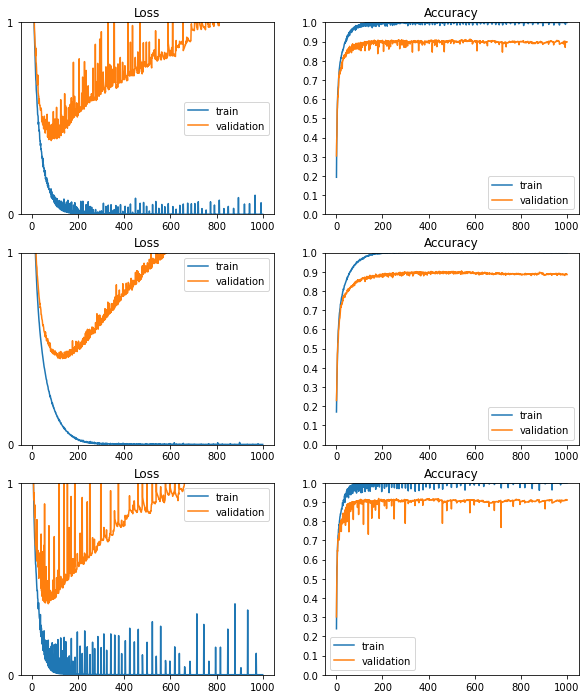

In [85]:
NetworksPlotUtils.plot_models_loss_acc_history(models_history, 
                                               min_loss=0, max_loss=1, 
                                               step_loss=1, step_acc=0.1,
                                               min_acc=0, max_acc=1)

A model which is overted to data was obtained. Lets try to add some reguralization

## Regularization - dropout

Overfit was achieved. Lets add some dropout.

In [86]:
my_models = list()

droupout_value = 0.2
my_models.append(K.models.Sequential())

my_models[0].add(input_normalization_layer)
my_models[0].add(K.layers.Dense(128, activation='relu', input_shape=(data.shape[1],)))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(64, activation='relu',))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(64, activation='relu'))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(32, activation='relu'))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(labels.shape[1], activation='softmax'))

my_models.append(K.models.Sequential())
my_models[1].add(input_normalization_layer)
my_models[1].add(K.layers.Dense(64, activation='relu', input_shape=(data.shape[1],)))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(64, activation='relu'))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(32, activation='relu'))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(labels.shape[1], activation='softmax'))


my_models.append(K.models.Sequential())
my_models[2].add(input_normalization_layer)
my_models[2].add(K.layers.Dense(256, activation='relu', input_shape=(data.shape[1],)))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(128, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(64, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(64, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(32, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(labels.shape[1], activation='softmax'))

models_history = list()
for model in my_models:
    print(model)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    
    models_history.append(model.fit(x_train, 
                                    y_train, 
                                    batch_size=512, 
                                    epochs = 600,
                                    validation_data=(x_val, y_val)))

Epoch 1/600
7/7 [==============================] - 0s 38ms/step - loss: 2.2726 - accuracy: 0.1561 - val_loss: 2.1666 - val_accuracy: 0.2879
Epoch 2/600
7/7 [==============================] - 0s 20ms/step - loss: 2.1449 - accuracy: 0.2438 - val_loss: 2.0396 - val_accuracy: 0.3257
Epoch 3/600
7/7 [==============================] - 0s 18ms/step - loss: 2.0263 - accuracy: 0.3073 - val_loss: 1.8992 - val_accuracy: 0.3652
Epoch 4/600
7/7 [==============================] - 0s 19ms/step - loss: 1.9202 - accuracy: 0.3545 - val_loss: 1.7851 - val_accuracy: 0.4112
Epoch 5/600
7/7 [==============================] - 0s 31ms/step - loss: 1.8385 - accuracy: 0.3711 - val_loss: 1.6845 - val_accuracy: 0.4425
Epoch 6/600
7/7 [==============================] - 0s 16ms/step - loss: 1.7687 - accuracy: 0.3922 - val_loss: 1.6116 - val_accuracy: 0.4811
Epoch 7/600
7/7 [==============================] - 0s 14ms/step - loss: 1.7031 - accuracy: 0.4256 - val_loss: 1.5436 - val_accuracy: 0.5078
Epoch 8/600
7/7 [===

7/7 [==============================] - 0s 17ms/step - loss: 0.5057 - accuracy: 0.8301 - val_loss: 0.4545 - val_accuracy: 0.8565
Epoch 117/600
7/7 [==============================] - 0s 27ms/step - loss: 0.5120 - accuracy: 0.8329 - val_loss: 0.4494 - val_accuracy: 0.8546
Epoch 118/600
7/7 [==============================] - 0s 23ms/step - loss: 0.5051 - accuracy: 0.8313 - val_loss: 0.4462 - val_accuracy: 0.8602
Epoch 119/600
7/7 [==============================] - 0s 22ms/step - loss: 0.4870 - accuracy: 0.8405 - val_loss: 0.4428 - val_accuracy: 0.8583
Epoch 120/600
7/7 [==============================] - 0s 29ms/step - loss: 0.5288 - accuracy: 0.8264 - val_loss: 0.4406 - val_accuracy: 0.8611
Epoch 121/600
7/7 [==============================] - 0s 20ms/step - loss: 0.4932 - accuracy: 0.8405 - val_loss: 0.4413 - val_accuracy: 0.8611
Epoch 122/600
7/7 [==============================] - 0s 26ms/step - loss: 0.5026 - accuracy: 0.8393 - val_loss: 0.4361 - val_accuracy: 0.8666
Epoch 123/600
7/7 [=

Epoch 174/600
7/7 [==============================] - 0s 22ms/step - loss: 0.3920 - accuracy: 0.8770 - val_loss: 0.3584 - val_accuracy: 0.8896
Epoch 175/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3596 - accuracy: 0.8832 - val_loss: 0.3597 - val_accuracy: 0.8878
Epoch 176/600
7/7 [==============================] - 0s 11ms/step - loss: 0.3825 - accuracy: 0.8734 - val_loss: 0.3545 - val_accuracy: 0.8859
Epoch 177/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3830 - accuracy: 0.8795 - val_loss: 0.3489 - val_accuracy: 0.8924
Epoch 178/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3795 - accuracy: 0.8795 - val_loss: 0.3451 - val_accuracy: 0.9025
Epoch 179/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3720 - accuracy: 0.8832 - val_loss: 0.3557 - val_accuracy: 0.8896
Epoch 180/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3623 - accuracy: 0.8838 - val_loss: 0.3537 - val_accuracy: 0.8924
Epoch 

Epoch 232/600
7/7 [==============================] - 0s 15ms/step - loss: 0.2954 - accuracy: 0.9089 - val_loss: 0.3189 - val_accuracy: 0.9043
Epoch 233/600
7/7 [==============================] - 0s 25ms/step - loss: 0.2900 - accuracy: 0.9049 - val_loss: 0.3102 - val_accuracy: 0.9052
Epoch 234/600
7/7 [==============================] - 0s 45ms/step - loss: 0.2935 - accuracy: 0.9068 - val_loss: 0.3134 - val_accuracy: 0.9071
Epoch 235/600
7/7 [==============================] - 0s 47ms/step - loss: 0.2890 - accuracy: 0.9071 - val_loss: 0.3063 - val_accuracy: 0.9052
Epoch 236/600
7/7 [==============================] - 0s 49ms/step - loss: 0.2795 - accuracy: 0.9077 - val_loss: 0.3044 - val_accuracy: 0.9071
Epoch 237/600
7/7 [==============================] - 0s 39ms/step - loss: 0.2827 - accuracy: 0.9132 - val_loss: 0.3090 - val_accuracy: 0.9089
Epoch 238/600
7/7 [==============================] - 0s 42ms/step - loss: 0.2910 - accuracy: 0.9062 - val_loss: 0.3118 - val_accuracy: 0.9052
Epoch 

Epoch 290/600
7/7 [==============================] - 0s 29ms/step - loss: 0.2427 - accuracy: 0.9200 - val_loss: 0.2947 - val_accuracy: 0.9154
Epoch 291/600
7/7 [==============================] - 0s 30ms/step - loss: 0.2578 - accuracy: 0.9157 - val_loss: 0.2933 - val_accuracy: 0.9144
Epoch 292/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2287 - accuracy: 0.9261 - val_loss: 0.2928 - val_accuracy: 0.9126
Epoch 293/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2364 - accuracy: 0.9295 - val_loss: 0.2943 - val_accuracy: 0.9135
Epoch 294/600
7/7 [==============================] - 0s 25ms/step - loss: 0.2453 - accuracy: 0.9227 - val_loss: 0.2923 - val_accuracy: 0.9172
Epoch 295/600
7/7 [==============================] - 0s 22ms/step - loss: 0.2765 - accuracy: 0.9193 - val_loss: 0.2893 - val_accuracy: 0.9154
Epoch 296/600
7/7 [==============================] - 0s 31ms/step - loss: 0.2589 - accuracy: 0.9224 - val_loss: 0.2864 - val_accuracy: 0.9144
Epoch 

Epoch 348/600
7/7 [==============================] - 0s 27ms/step - loss: 0.2259 - accuracy: 0.9313 - val_loss: 0.2890 - val_accuracy: 0.9117
Epoch 349/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2330 - accuracy: 0.9267 - val_loss: 0.2869 - val_accuracy: 0.9117
Epoch 350/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1946 - accuracy: 0.9384 - val_loss: 0.2895 - val_accuracy: 0.9154
Epoch 351/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1913 - accuracy: 0.9387 - val_loss: 0.2903 - val_accuracy: 0.9135
Epoch 352/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2049 - accuracy: 0.9381 - val_loss: 0.2918 - val_accuracy: 0.9135
Epoch 353/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1964 - accuracy: 0.9374 - val_loss: 0.2882 - val_accuracy: 0.9135
Epoch 354/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2323 - accuracy: 0.9261 - val_loss: 0.3002 - val_accuracy: 0.9135
Epoch 

Epoch 406/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1657 - accuracy: 0.9497 - val_loss: 0.2878 - val_accuracy: 0.9264
Epoch 407/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2090 - accuracy: 0.9325 - val_loss: 0.2905 - val_accuracy: 0.9246
Epoch 408/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1778 - accuracy: 0.9430 - val_loss: 0.2844 - val_accuracy: 0.9246
Epoch 409/600
7/7 [==============================] - 0s 17ms/step - loss: 0.1605 - accuracy: 0.9519 - val_loss: 0.2865 - val_accuracy: 0.9218
Epoch 410/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1795 - accuracy: 0.9439 - val_loss: 0.2876 - val_accuracy: 0.9236
Epoch 411/600
7/7 [==============================] - 0s 17ms/step - loss: 0.2005 - accuracy: 0.9405 - val_loss: 0.2825 - val_accuracy: 0.9227
Epoch 412/600
7/7 [==============================] - 0s 25ms/step - loss: 0.1802 - accuracy: 0.9411 - val_loss: 0.2841 - val_accuracy: 0.9273
Epoch 

Epoch 464/600
7/7 [==============================] - 0s 15ms/step - loss: 0.1563 - accuracy: 0.9519 - val_loss: 0.2966 - val_accuracy: 0.9236
Epoch 465/600
7/7 [==============================] - 0s 13ms/step - loss: 0.1938 - accuracy: 0.9387 - val_loss: 0.3016 - val_accuracy: 0.9236
Epoch 466/600
7/7 [==============================] - 0s 13ms/step - loss: 0.1778 - accuracy: 0.9445 - val_loss: 0.3006 - val_accuracy: 0.9227
Epoch 467/600
7/7 [==============================] - 0s 14ms/step - loss: 0.1687 - accuracy: 0.9503 - val_loss: 0.2993 - val_accuracy: 0.9209
Epoch 468/600
7/7 [==============================] - 0s 17ms/step - loss: 0.1906 - accuracy: 0.9430 - val_loss: 0.2988 - val_accuracy: 0.9190
Epoch 469/600
7/7 [==============================] - 0s 16ms/step - loss: 0.1717 - accuracy: 0.9525 - val_loss: 0.2926 - val_accuracy: 0.9227
Epoch 470/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1654 - accuracy: 0.9522 - val_loss: 0.2919 - val_accuracy: 0.9218
Epoch 

Epoch 522/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1588 - accuracy: 0.9540 - val_loss: 0.3086 - val_accuracy: 0.9236
Epoch 523/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1566 - accuracy: 0.9543 - val_loss: 0.3111 - val_accuracy: 0.9209
Epoch 524/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1481 - accuracy: 0.9577 - val_loss: 0.3132 - val_accuracy: 0.9236
Epoch 525/600
7/7 [==============================] - 0s 15ms/step - loss: 0.1780 - accuracy: 0.9482 - val_loss: 0.3140 - val_accuracy: 0.9218
Epoch 526/600
7/7 [==============================] - 0s 18ms/step - loss: 0.1494 - accuracy: 0.9565 - val_loss: 0.3032 - val_accuracy: 0.9236
Epoch 527/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1649 - accuracy: 0.9503 - val_loss: 0.2936 - val_accuracy: 0.9273
Epoch 528/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1566 - accuracy: 0.9558 - val_loss: 0.2961 - val_accuracy: 0.9273
Epoch 

Epoch 580/600
7/7 [==============================] - 0s 15ms/step - loss: 0.1498 - accuracy: 0.9546 - val_loss: 0.3072 - val_accuracy: 0.9200
Epoch 581/600
7/7 [==============================] - 0s 12ms/step - loss: 0.1500 - accuracy: 0.9528 - val_loss: 0.3066 - val_accuracy: 0.9227
Epoch 582/600
7/7 [==============================] - 0s 16ms/step - loss: 0.1265 - accuracy: 0.9595 - val_loss: 0.3014 - val_accuracy: 0.9236
Epoch 583/600
7/7 [==============================] - 0s 15ms/step - loss: 0.1427 - accuracy: 0.9571 - val_loss: 0.3054 - val_accuracy: 0.9264
Epoch 584/600
7/7 [==============================] - 0s 16ms/step - loss: 0.1450 - accuracy: 0.9598 - val_loss: 0.3068 - val_accuracy: 0.9227
Epoch 585/600
7/7 [==============================] - 0s 15ms/step - loss: 0.1550 - accuracy: 0.9543 - val_loss: 0.3019 - val_accuracy: 0.9227
Epoch 586/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1546 - accuracy: 0.9506 - val_loss: 0.3090 - val_accuracy: 0.9209
Epoch 

7/7 [==============================] - 0s 17ms/step - loss: 0.7967 - accuracy: 0.7344 - val_loss: 0.6625 - val_accuracy: 0.8105
Epoch 96/600
7/7 [==============================] - 0s 20ms/step - loss: 0.8071 - accuracy: 0.7338 - val_loss: 0.6608 - val_accuracy: 0.8040
Epoch 97/600
7/7 [==============================] - 0s 19ms/step - loss: 0.7910 - accuracy: 0.7351 - val_loss: 0.6583 - val_accuracy: 0.8077
Epoch 98/600
7/7 [==============================] - 0s 14ms/step - loss: 0.7683 - accuracy: 0.7513 - val_loss: 0.6506 - val_accuracy: 0.8086
Epoch 99/600
7/7 [==============================] - 0s 14ms/step - loss: 0.7890 - accuracy: 0.7357 - val_loss: 0.6487 - val_accuracy: 0.8114
Epoch 100/600
7/7 [==============================] - 0s 17ms/step - loss: 0.7832 - accuracy: 0.7406 - val_loss: 0.6495 - val_accuracy: 0.8096
Epoch 101/600
7/7 [==============================] - 0s 16ms/step - loss: 0.7941 - accuracy: 0.7289 - val_loss: 0.6488 - val_accuracy: 0.8077
Epoch 102/600
7/7 [=====

Epoch 153/600
7/7 [==============================] - 0s 19ms/step - loss: 0.6627 - accuracy: 0.7795 - val_loss: 0.5411 - val_accuracy: 0.8399
Epoch 154/600
7/7 [==============================] - 0s 16ms/step - loss: 0.6348 - accuracy: 0.7890 - val_loss: 0.5398 - val_accuracy: 0.8390
Epoch 155/600
7/7 [==============================] - 0s 19ms/step - loss: 0.6613 - accuracy: 0.7810 - val_loss: 0.5370 - val_accuracy: 0.8362
Epoch 156/600
7/7 [==============================] - 0s 20ms/step - loss: 0.6455 - accuracy: 0.7844 - val_loss: 0.5363 - val_accuracy: 0.8335
Epoch 157/600
7/7 [==============================] - 0s 28ms/step - loss: 0.6608 - accuracy: 0.7755 - val_loss: 0.5340 - val_accuracy: 0.8353
Epoch 158/600
7/7 [==============================] - 0s 14ms/step - loss: 0.6150 - accuracy: 0.8001 - val_loss: 0.5297 - val_accuracy: 0.8436
Epoch 159/600
7/7 [==============================] - 0s 13ms/step - loss: 0.6554 - accuracy: 0.7768 - val_loss: 0.5310 - val_accuracy: 0.8408
Epoch 

Epoch 211/600
7/7 [==============================] - 0s 16ms/step - loss: 0.5692 - accuracy: 0.8132 - val_loss: 0.4660 - val_accuracy: 0.8537
Epoch 212/600
7/7 [==============================] - 0s 19ms/step - loss: 0.5607 - accuracy: 0.8044 - val_loss: 0.4682 - val_accuracy: 0.8528
Epoch 213/600
7/7 [==============================] - 0s 14ms/step - loss: 0.5494 - accuracy: 0.8172 - val_loss: 0.4627 - val_accuracy: 0.8556
Epoch 214/600
7/7 [==============================] - 0s 23ms/step - loss: 0.5701 - accuracy: 0.8025 - val_loss: 0.4589 - val_accuracy: 0.8583
Epoch 215/600
7/7 [==============================] - 0s 33ms/step - loss: 0.5421 - accuracy: 0.8200 - val_loss: 0.4581 - val_accuracy: 0.8611
Epoch 216/600
7/7 [==============================] - 0s 23ms/step - loss: 0.5387 - accuracy: 0.8218 - val_loss: 0.4612 - val_accuracy: 0.8620
Epoch 217/600
7/7 [==============================] - 0s 15ms/step - loss: 0.5585 - accuracy: 0.8074 - val_loss: 0.4564 - val_accuracy: 0.8666
Epoch 

Epoch 269/600
7/7 [==============================] - 0s 16ms/step - loss: 0.4748 - accuracy: 0.8479 - val_loss: 0.4315 - val_accuracy: 0.8684
Epoch 270/600
7/7 [==============================] - 0s 14ms/step - loss: 0.4918 - accuracy: 0.8304 - val_loss: 0.4322 - val_accuracy: 0.8657
Epoch 271/600
7/7 [==============================] - 0s 13ms/step - loss: 0.4869 - accuracy: 0.8356 - val_loss: 0.4402 - val_accuracy: 0.8694
Epoch 272/600
7/7 [==============================] - 0s 13ms/step - loss: 0.4944 - accuracy: 0.8356 - val_loss: 0.4324 - val_accuracy: 0.8675
Epoch 273/600
7/7 [==============================] - 0s 16ms/step - loss: 0.4974 - accuracy: 0.8298 - val_loss: 0.4305 - val_accuracy: 0.8666
Epoch 274/600
7/7 [==============================] - 0s 17ms/step - loss: 0.4857 - accuracy: 0.8366 - val_loss: 0.4281 - val_accuracy: 0.8666
Epoch 275/600
7/7 [==============================] - 0s 13ms/step - loss: 0.4813 - accuracy: 0.8353 - val_loss: 0.4271 - val_accuracy: 0.8721
Epoch 

Epoch 327/600
7/7 [==============================] - 0s 15ms/step - loss: 0.4551 - accuracy: 0.8516 - val_loss: 0.4044 - val_accuracy: 0.8703
Epoch 328/600
7/7 [==============================] - 0s 13ms/step - loss: 0.4482 - accuracy: 0.8525 - val_loss: 0.4020 - val_accuracy: 0.8767
Epoch 329/600
7/7 [==============================] - 0s 11ms/step - loss: 0.4355 - accuracy: 0.8507 - val_loss: 0.4028 - val_accuracy: 0.8795
Epoch 330/600
7/7 [==============================] - 0s 14ms/step - loss: 0.4406 - accuracy: 0.8504 - val_loss: 0.4043 - val_accuracy: 0.8776
Epoch 331/600
7/7 [==============================] - 0s 13ms/step - loss: 0.4425 - accuracy: 0.8525 - val_loss: 0.4060 - val_accuracy: 0.8758
Epoch 332/600
7/7 [==============================] - 0s 12ms/step - loss: 0.4318 - accuracy: 0.8494 - val_loss: 0.4001 - val_accuracy: 0.8758
Epoch 333/600
7/7 [==============================] - 0s 13ms/step - loss: 0.4474 - accuracy: 0.8488 - val_loss: 0.3999 - val_accuracy: 0.8749
Epoch 

Epoch 385/600
7/7 [==============================] - 0s 15ms/step - loss: 0.4331 - accuracy: 0.8504 - val_loss: 0.3930 - val_accuracy: 0.8776
Epoch 386/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3943 - accuracy: 0.8709 - val_loss: 0.3872 - val_accuracy: 0.8786
Epoch 387/600
7/7 [==============================] - 0s 14ms/step - loss: 0.4022 - accuracy: 0.8565 - val_loss: 0.3901 - val_accuracy: 0.8776
Epoch 388/600
7/7 [==============================] - 0s 10ms/step - loss: 0.4058 - accuracy: 0.8638 - val_loss: 0.3877 - val_accuracy: 0.8786
Epoch 389/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3976 - accuracy: 0.8648 - val_loss: 0.3889 - val_accuracy: 0.8850
Epoch 390/600
7/7 [==============================] - 0s 14ms/step - loss: 0.4034 - accuracy: 0.8657 - val_loss: 0.3872 - val_accuracy: 0.8878
Epoch 391/600
7/7 [==============================] - 0s 11ms/step - loss: 0.4122 - accuracy: 0.8651 - val_loss: 0.3903 - val_accuracy: 0.8804
Epoch 

Epoch 443/600
7/7 [==============================] - 0s 13ms/step - loss: 0.3888 - accuracy: 0.8700 - val_loss: 0.3787 - val_accuracy: 0.8896
Epoch 444/600
7/7 [==============================] - 0s 13ms/step - loss: 0.3862 - accuracy: 0.8681 - val_loss: 0.3747 - val_accuracy: 0.8924
Epoch 445/600
7/7 [==============================] - 0s 21ms/step - loss: 0.3914 - accuracy: 0.8660 - val_loss: 0.3807 - val_accuracy: 0.8887
Epoch 446/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3905 - accuracy: 0.8727 - val_loss: 0.3830 - val_accuracy: 0.8868
Epoch 447/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3687 - accuracy: 0.8798 - val_loss: 0.3882 - val_accuracy: 0.8850
Epoch 448/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3626 - accuracy: 0.8816 - val_loss: 0.3814 - val_accuracy: 0.8868
Epoch 449/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3554 - accuracy: 0.8819 - val_loss: 0.3838 - val_accuracy: 0.8832
Epoch 

Epoch 501/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3801 - accuracy: 0.8715 - val_loss: 0.3768 - val_accuracy: 0.8804
Epoch 502/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3591 - accuracy: 0.8786 - val_loss: 0.3815 - val_accuracy: 0.8850
Epoch 503/600
7/7 [==============================] - 0s 13ms/step - loss: 0.3543 - accuracy: 0.8865 - val_loss: 0.3779 - val_accuracy: 0.8822
Epoch 504/600
7/7 [==============================] - 0s 13ms/step - loss: 0.3564 - accuracy: 0.8853 - val_loss: 0.3755 - val_accuracy: 0.8841
Epoch 505/600
7/7 [==============================] - 0s 13ms/step - loss: 0.3664 - accuracy: 0.8789 - val_loss: 0.3742 - val_accuracy: 0.8887
Epoch 506/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3638 - accuracy: 0.8813 - val_loss: 0.3754 - val_accuracy: 0.8832
Epoch 507/600
7/7 [==============================] - 0s 26ms/step - loss: 0.3678 - accuracy: 0.8804 - val_loss: 0.3743 - val_accuracy: 0.8859
Epoch 

Epoch 559/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3437 - accuracy: 0.8908 - val_loss: 0.3741 - val_accuracy: 0.8960
Epoch 560/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3512 - accuracy: 0.8875 - val_loss: 0.3709 - val_accuracy: 0.8942
Epoch 561/600
7/7 [==============================] - 0s 12ms/step - loss: 0.3558 - accuracy: 0.8826 - val_loss: 0.3741 - val_accuracy: 0.8933
Epoch 562/600
7/7 [==============================] - 0s 14ms/step - loss: 0.3145 - accuracy: 0.8948 - val_loss: 0.3734 - val_accuracy: 0.8942
Epoch 563/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3428 - accuracy: 0.8856 - val_loss: 0.3761 - val_accuracy: 0.8905
Epoch 564/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3576 - accuracy: 0.8829 - val_loss: 0.3740 - val_accuracy: 0.8924
Epoch 565/600
7/7 [==============================] - 0s 15ms/step - loss: 0.3363 - accuracy: 0.8899 - val_loss: 0.3718 - val_accuracy: 0.8887
Epoch 

7/7 [==============================] - 0s 20ms/step - loss: 0.4100 - accuracy: 0.8709 - val_loss: 0.3890 - val_accuracy: 0.8868
Epoch 75/600
7/7 [==============================] - 0s 18ms/step - loss: 0.3570 - accuracy: 0.8884 - val_loss: 0.4054 - val_accuracy: 0.8859
Epoch 76/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3848 - accuracy: 0.8816 - val_loss: 0.3679 - val_accuracy: 0.8924
Epoch 77/600
7/7 [==============================] - 0s 23ms/step - loss: 0.3804 - accuracy: 0.8816 - val_loss: 0.3812 - val_accuracy: 0.8841
Epoch 78/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3417 - accuracy: 0.8908 - val_loss: 0.3804 - val_accuracy: 0.8878
Epoch 79/600
7/7 [==============================] - 0s 18ms/step - loss: 0.3540 - accuracy: 0.8911 - val_loss: 0.3754 - val_accuracy: 0.8960
Epoch 80/600
7/7 [==============================] - 0s 20ms/step - loss: 0.3581 - accuracy: 0.8856 - val_loss: 0.3733 - val_accuracy: 0.8905
Epoch 81/600
7/7 [========

Epoch 132/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2106 - accuracy: 0.9427 - val_loss: 0.3387 - val_accuracy: 0.9190
Epoch 133/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1837 - accuracy: 0.9439 - val_loss: 0.3319 - val_accuracy: 0.9190
Epoch 134/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1892 - accuracy: 0.9451 - val_loss: 0.3267 - val_accuracy: 0.9172
Epoch 135/600
7/7 [==============================] - 0s 24ms/step - loss: 0.2064 - accuracy: 0.9436 - val_loss: 0.3215 - val_accuracy: 0.9154
Epoch 136/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1842 - accuracy: 0.9482 - val_loss: 0.3106 - val_accuracy: 0.9200
Epoch 137/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1620 - accuracy: 0.9512 - val_loss: 0.3028 - val_accuracy: 0.9236
Epoch 138/600
7/7 [==============================] - 0s 27ms/step - loss: 0.1661 - accuracy: 0.9485 - val_loss: 0.3055 - val_accuracy: 0.9264
Epoch 

Epoch 190/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1305 - accuracy: 0.9626 - val_loss: 0.3137 - val_accuracy: 0.9292
Epoch 191/600
7/7 [==============================] - 0s 18ms/step - loss: 0.1446 - accuracy: 0.9574 - val_loss: 0.3254 - val_accuracy: 0.9292
Epoch 192/600
7/7 [==============================] - 0s 18ms/step - loss: 0.1361 - accuracy: 0.9644 - val_loss: 0.3076 - val_accuracy: 0.9319
Epoch 193/600
7/7 [==============================] - 0s 16ms/step - loss: 0.1044 - accuracy: 0.9706 - val_loss: 0.3213 - val_accuracy: 0.9255
Epoch 194/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0999 - accuracy: 0.9693 - val_loss: 0.3265 - val_accuracy: 0.9319
Epoch 195/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1100 - accuracy: 0.9687 - val_loss: 0.3151 - val_accuracy: 0.9310
Epoch 196/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1013 - accuracy: 0.9733 - val_loss: 0.3221 - val_accuracy: 0.9282
Epoch 

Epoch 248/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0908 - accuracy: 0.9749 - val_loss: 0.3383 - val_accuracy: 0.9282
Epoch 249/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0895 - accuracy: 0.9761 - val_loss: 0.3303 - val_accuracy: 0.9310
Epoch 250/600
7/7 [==============================] - 0s 18ms/step - loss: 0.0734 - accuracy: 0.9822 - val_loss: 0.3260 - val_accuracy: 0.9319
Epoch 251/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0943 - accuracy: 0.9733 - val_loss: 0.3415 - val_accuracy: 0.9310
Epoch 252/600
7/7 [==============================] - 0s 25ms/step - loss: 0.0770 - accuracy: 0.9773 - val_loss: 0.3397 - val_accuracy: 0.9310
Epoch 253/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0855 - accuracy: 0.9791 - val_loss: 0.3480 - val_accuracy: 0.9301
Epoch 254/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0936 - accuracy: 0.9749 - val_loss: 0.3305 - val_accuracy: 0.9347
Epoch 

Epoch 306/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0608 - accuracy: 0.9822 - val_loss: 0.3567 - val_accuracy: 0.9292
Epoch 307/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0646 - accuracy: 0.9825 - val_loss: 0.3573 - val_accuracy: 0.9319
Epoch 308/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0713 - accuracy: 0.9813 - val_loss: 0.3536 - val_accuracy: 0.9328
Epoch 309/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0628 - accuracy: 0.9834 - val_loss: 0.3501 - val_accuracy: 0.9319
Epoch 310/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.3475 - val_accuracy: 0.9328
Epoch 311/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0640 - accuracy: 0.9816 - val_loss: 0.3419 - val_accuracy: 0.9319
Epoch 312/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0611 - accuracy: 0.9831 - val_loss: 0.3405 - val_accuracy: 0.9338
Epoch 

Epoch 364/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0648 - accuracy: 0.9844 - val_loss: 0.3379 - val_accuracy: 0.9393
Epoch 365/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0496 - accuracy: 0.9853 - val_loss: 0.3595 - val_accuracy: 0.9365
Epoch 366/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.3701 - val_accuracy: 0.9310
Epoch 367/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0611 - accuracy: 0.9844 - val_loss: 0.3811 - val_accuracy: 0.9328
Epoch 368/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0551 - accuracy: 0.9865 - val_loss: 0.3488 - val_accuracy: 0.9319
Epoch 369/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0454 - accuracy: 0.9880 - val_loss: 0.3576 - val_accuracy: 0.9338
Epoch 370/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0476 - accuracy: 0.9883 - val_loss: 0.3607 - val_accuracy: 0.9319
Epoch 

Epoch 422/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0476 - accuracy: 0.9871 - val_loss: 0.3790 - val_accuracy: 0.9310
Epoch 423/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0416 - accuracy: 0.9880 - val_loss: 0.3843 - val_accuracy: 0.9365
Epoch 424/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0447 - accuracy: 0.9871 - val_loss: 0.3717 - val_accuracy: 0.9384
Epoch 425/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.3609 - val_accuracy: 0.9393
Epoch 426/600
7/7 [==============================] - 0s 25ms/step - loss: 0.0369 - accuracy: 0.9893 - val_loss: 0.3724 - val_accuracy: 0.9384
Epoch 427/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0445 - accuracy: 0.9899 - val_loss: 0.3697 - val_accuracy: 0.9402
Epoch 428/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0456 - accuracy: 0.9877 - val_loss: 0.3929 - val_accuracy: 0.9347
Epoch 

Epoch 480/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 0.9902 - val_loss: 0.3897 - val_accuracy: 0.9356
Epoch 481/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0335 - accuracy: 0.9917 - val_loss: 0.3925 - val_accuracy: 0.9338
Epoch 482/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0520 - accuracy: 0.9883 - val_loss: 0.3829 - val_accuracy: 0.9347
Epoch 483/600
7/7 [==============================] - 0s 18ms/step - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.4095 - val_accuracy: 0.9282
Epoch 484/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0370 - accuracy: 0.9896 - val_loss: 0.4132 - val_accuracy: 0.9310
Epoch 485/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0476 - accuracy: 0.9883 - val_loss: 0.4065 - val_accuracy: 0.9310
Epoch 486/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.3942 - val_accuracy: 0.9319
Epoch 

Epoch 538/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.3619 - val_accuracy: 0.9420
Epoch 539/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0265 - accuracy: 0.9933 - val_loss: 0.3763 - val_accuracy: 0.9356
Epoch 540/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0315 - accuracy: 0.9920 - val_loss: 0.3849 - val_accuracy: 0.9384
Epoch 541/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0352 - accuracy: 0.9923 - val_loss: 0.3924 - val_accuracy: 0.9347
Epoch 542/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0318 - accuracy: 0.9911 - val_loss: 0.3812 - val_accuracy: 0.9393
Epoch 543/600
7/7 [==============================] - 0s 18ms/step - loss: 0.0345 - accuracy: 0.9902 - val_loss: 0.3950 - val_accuracy: 0.9338
Epoch 544/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0433 - accuracy: 0.9893 - val_loss: 0.4031 - val_accuracy: 0.9347
Epoch 

Epoch 596/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0252 - accuracy: 0.9948 - val_loss: 0.4007 - val_accuracy: 0.9365
Epoch 597/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0293 - accuracy: 0.9933 - val_loss: 0.4014 - val_accuracy: 0.9365
Epoch 598/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0540 - accuracy: 0.9887 - val_loss: 0.3886 - val_accuracy: 0.9365
Epoch 599/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0599 - accuracy: 0.9887 - val_loss: 0.3951 - val_accuracy: 0.9301
Epoch 600/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0328 - accuracy: 0.9911 - val_loss: 0.3827 - val_accuracy: 0.9365


Model 1
At minimizer of train's loss (i = 578): loss = 0.13; acc = 0.96
At minimizer of validations's loss (i = 362): loss = 0.28; acc = 0.92
At maximizer of train's accuracy (i = 578): loss = 0.13; acc = 0.96
At maximizer of validations's accuracy (i = 472):  loss = 0.29; acc = 0.93


Model 2
At minimizer of train's loss (i = 561): loss = 0.31; acc = 0.89
At minimizer of validations's loss (i = 582): loss = 0.37; acc = 0.89
At maximizer of train's accuracy (i = 526): loss = 0.32; acc = 0.90
At maximizer of validations's accuracy (i = 576):  loss = 0.37; acc = 0.90


Model 3
At minimizer of train's loss (i = 595): loss = 0.03; acc = 0.99
At minimizer of validations's loss (i = 136): loss = 0.30; acc = 0.94
At maximizer of train's accuracy (i = 595): loss = 0.03; acc = 0.99
At maximizer of validations's accuracy (i = 381):  loss = 0.35; acc = 0.94




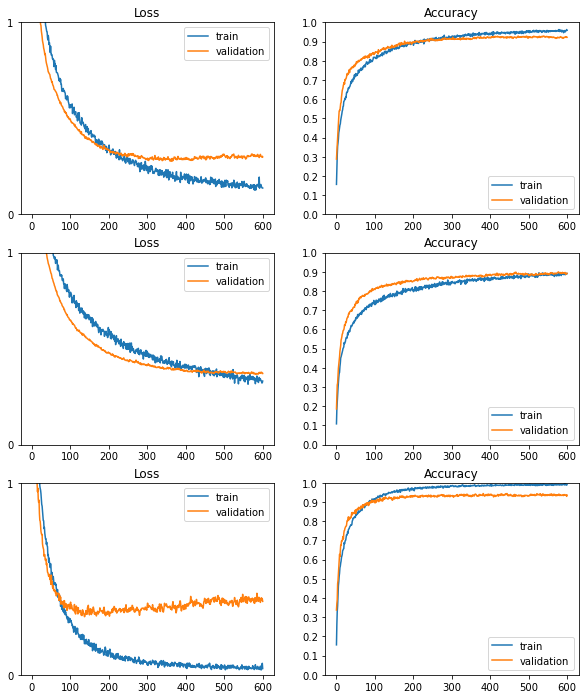

In [87]:
NetworksPlotUtils.plot_models_loss_acc_history(models_history, 
                                               min_loss=0, max_loss=1, 
                                               step_loss=1, step_acc=0.1,
                                               min_acc=0, max_acc=1)

## Next Steps
The model with more layers achieved more performance. Now we will try to:

1 - Add more units to the layers

2 - Add one more layer

3 - Add less units (to avoid overfitting)

In [113]:
my_models = list()

droupout_value = 0.2

## with more units
my_models.append(K.models.Sequential())
my_models[0].add(input_normalization_layer)
my_models[0].add(K.layers.Dense(256*2, activation='relu', input_shape=(data.shape[1],)))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(128*2, activation='relu'))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(64*2, activation='relu'))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(64*2, activation='relu'))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(32*2, activation='relu'))
my_models[0].add(K.layers.Dropout(droupout_value))
my_models[0].add(K.layers.Dense(labels.shape[1], activation='softmax'))

## with less units
my_models.append(K.models.Sequential())
my_models[1].add(input_normalization_layer)
my_models[1].add(K.layers.Dense(256/2, activation='relu', input_shape=(data.shape[1],)))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(128/2, activation='relu'))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(64/2, activation='relu'))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(64/2, activation='relu'))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(32/2, activation='relu'))
my_models[1].add(K.layers.Dropout(droupout_value))
my_models[1].add(K.layers.Dense(labels.shape[1], activation='softmax'))

## with one more layer
my_models.append(K.models.Sequential())
my_models[2].add(input_normalization_layer)
my_models[2].add(K.layers.Dense(256*2, activation='relu', input_shape=(data.shape[1],)))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(256, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(128, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(64, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(64, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(32, activation='relu'))
my_models[2].add(K.layers.Dropout(droupout_value))
my_models[2].add(K.layers.Dense(labels.shape[1], activation='softmax'))

models_history = list()
for model in my_models:
    print(model)
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    
    models_history.append(model.fit(x_train, 
                                    y_train, 
                                    batch_size=512, 
                                    epochs = 600,
                                    validation_data=(x_val, y_val)))

Epoch 1/600
7/7 [==============================] - 1s 75ms/step - loss: 2.1237 - accuracy: 0.2508 - val_loss: 1.7215 - val_accuracy: 0.4186
Epoch 2/600
7/7 [==============================] - 0s 33ms/step - loss: 1.7319 - accuracy: 0.4146 - val_loss: 1.5151 - val_accuracy: 0.4986
Epoch 3/600
7/7 [==============================] - 0s 48ms/step - loss: 1.5318 - accuracy: 0.4796 - val_loss: 1.3227 - val_accuracy: 0.5630
Epoch 4/600
7/7 [==============================] - 0s 36ms/step - loss: 1.4273 - accuracy: 0.5210 - val_loss: 1.2062 - val_accuracy: 0.6063
Epoch 5/600
7/7 [==============================] - 0s 66ms/step - loss: 1.2968 - accuracy: 0.5750 - val_loss: 1.1080 - val_accuracy: 0.6293
Epoch 6/600
7/7 [==============================] - 0s 51ms/step - loss: 1.1989 - accuracy: 0.6032 - val_loss: 1.0206 - val_accuracy: 0.6569
Epoch 7/600
7/7 [==============================] - 0s 49ms/step - loss: 1.1685 - accuracy: 0.6041 - val_loss: 0.9950 - val_accuracy: 0.6725
Epoch 8/600
7/7 [===

7/7 [==============================] - 0s 37ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.3495 - val_accuracy: 0.9292
Epoch 117/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0414 - accuracy: 0.9902 - val_loss: 0.3726 - val_accuracy: 0.9163
Epoch 118/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.4030 - val_accuracy: 0.9200
Epoch 119/600
7/7 [==============================] - 0s 46ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.3564 - val_accuracy: 0.9190
Epoch 120/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0367 - accuracy: 0.9847 - val_loss: 0.3247 - val_accuracy: 0.9301
Epoch 121/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.3496 - val_accuracy: 0.9310
Epoch 122/600
7/7 [==============================] - 0s 41ms/step - loss: 0.0541 - accuracy: 0.9859 - val_loss: 0.3314 - val_accuracy: 0.9282
Epoch 123/600
7/7 [=

Epoch 174/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.3559 - val_accuracy: 0.9365
Epoch 175/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.3869 - val_accuracy: 0.9319
Epoch 176/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.3974 - val_accuracy: 0.9365
Epoch 177/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.4009 - val_accuracy: 0.9347
Epoch 178/600
7/7 [==============================] - 0s 43ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.4438 - val_accuracy: 0.9282
Epoch 179/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.4056 - val_accuracy: 0.9328
Epoch 180/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0271 - accuracy: 0.9923 - val_loss: 0.3963 - val_accuracy: 0.9319
Epoch 

Epoch 232/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0229 - accuracy: 0.9948 - val_loss: 0.4022 - val_accuracy: 0.9393
Epoch 233/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0207 - accuracy: 0.9929 - val_loss: 0.4007 - val_accuracy: 0.9347
Epoch 234/600
7/7 [==============================] - 0s 45ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.4057 - val_accuracy: 0.9338
Epoch 235/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0235 - accuracy: 0.9923 - val_loss: 0.4249 - val_accuracy: 0.9356
Epoch 236/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.4267 - val_accuracy: 0.9347
Epoch 237/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.4267 - val_accuracy: 0.9374
Epoch 238/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.4390 - val_accuracy: 0.9246
Epoch 

Epoch 290/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.4203 - val_accuracy: 0.9310
Epoch 291/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0198 - accuracy: 0.9957 - val_loss: 0.4231 - val_accuracy: 0.9328
Epoch 292/600
7/7 [==============================] - 0s 53ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.4200 - val_accuracy: 0.9384
Epoch 293/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 0.4280 - val_accuracy: 0.9365
Epoch 294/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.4942 - val_accuracy: 0.9356
Epoch 295/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0271 - accuracy: 0.9942 - val_loss: 0.4660 - val_accuracy: 0.9365
Epoch 296/600
7/7 [==============================] - 0s 38ms/step - loss: 0.0091 - accuracy: 0.9960 - val_loss: 0.4784 - val_accuracy: 0.9347
Epoch 

Epoch 348/600
7/7 [==============================] - 0s 38ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.5003 - val_accuracy: 0.9356
Epoch 349/600
7/7 [==============================] - 0s 45ms/step - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.5021 - val_accuracy: 0.9365
Epoch 350/600
7/7 [==============================] - 0s 46ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.4867 - val_accuracy: 0.9365
Epoch 351/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.4677 - val_accuracy: 0.9365
Epoch 352/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.5192 - val_accuracy: 0.9365
Epoch 353/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0159 - accuracy: 0.9966 - val_loss: 0.4952 - val_accuracy: 0.9384
Epoch 354/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0175 - accuracy: 0.9948 - val_loss: 0.4632 - val_accuracy: 0.9384
Epoch 

Epoch 406/600
7/7 [==============================] - 0s 50ms/step - loss: 0.0100 - accuracy: 0.9963 - val_loss: 0.5128 - val_accuracy: 0.9292
Epoch 407/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.4819 - val_accuracy: 0.9338
Epoch 408/600
7/7 [==============================] - 0s 62ms/step - loss: 0.0116 - accuracy: 0.9988 - val_loss: 0.5191 - val_accuracy: 0.9310
Epoch 409/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0113 - accuracy: 0.9975 - val_loss: 0.5120 - val_accuracy: 0.9282
Epoch 410/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.4952 - val_accuracy: 0.9319
Epoch 411/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0179 - accuracy: 0.9963 - val_loss: 0.5127 - val_accuracy: 0.9292
Epoch 412/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0113 - accuracy: 0.9969 - val_loss: 0.4671 - val_accuracy: 0.9365
Epoch 

Epoch 464/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0155 - accuracy: 0.9957 - val_loss: 0.4814 - val_accuracy: 0.9319
Epoch 465/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0062 - accuracy: 0.9969 - val_loss: 0.4905 - val_accuracy: 0.9356
Epoch 466/600
7/7 [==============================] - 0s 45ms/step - loss: 0.0186 - accuracy: 0.9960 - val_loss: 0.4812 - val_accuracy: 0.9319
Epoch 467/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.4821 - val_accuracy: 0.9365
Epoch 468/600
7/7 [==============================] - 0s 45ms/step - loss: 0.0048 - accuracy: 0.9979 - val_loss: 0.4778 - val_accuracy: 0.9347
Epoch 469/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0078 - accuracy: 0.9966 - val_loss: 0.5615 - val_accuracy: 0.9301
Epoch 470/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.5301 - val_accuracy: 0.9328
Epoch 

Epoch 522/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0094 - accuracy: 0.9982 - val_loss: 0.5290 - val_accuracy: 0.9384
Epoch 523/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0156 - accuracy: 0.9969 - val_loss: 0.5120 - val_accuracy: 0.9402
Epoch 524/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0134 - accuracy: 0.9975 - val_loss: 0.4882 - val_accuracy: 0.9420
Epoch 525/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.5022 - val_accuracy: 0.9402
Epoch 526/600
7/7 [==============================] - 0s 50ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.4719 - val_accuracy: 0.9411
Epoch 527/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.4734 - val_accuracy: 0.9374
Epoch 528/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.5117 - val_accuracy: 0.9338
Epoch 

Epoch 580/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0065 - accuracy: 0.9975 - val_loss: 0.5352 - val_accuracy: 0.9347
Epoch 581/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.5998 - val_accuracy: 0.9273
Epoch 582/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0190 - accuracy: 0.9966 - val_loss: 0.5359 - val_accuracy: 0.9338
Epoch 583/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0182 - accuracy: 0.9969 - val_loss: 0.5094 - val_accuracy: 0.9374
Epoch 584/600
7/7 [==============================] - 0s 44ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.5235 - val_accuracy: 0.9356
Epoch 585/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.5321 - val_accuracy: 0.9365
Epoch 586/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0057 - accuracy: 0.9972 - val_loss: 0.4846 - val_accuracy: 0.9338
Epoch 

7/7 [==============================] - 0s 32ms/step - loss: 0.8429 - accuracy: 0.7225 - val_loss: 0.6287 - val_accuracy: 0.8105
Epoch 96/600
7/7 [==============================] - 0s 23ms/step - loss: 0.8161 - accuracy: 0.7317 - val_loss: 0.6106 - val_accuracy: 0.8197
Epoch 97/600
7/7 [==============================] - 0s 37ms/step - loss: 0.8075 - accuracy: 0.7369 - val_loss: 0.6055 - val_accuracy: 0.8132
Epoch 98/600
7/7 [==============================] - 0s 37ms/step - loss: 0.8038 - accuracy: 0.7390 - val_loss: 0.6107 - val_accuracy: 0.8132
Epoch 99/600
7/7 [==============================] - 0s 18ms/step - loss: 0.7755 - accuracy: 0.7421 - val_loss: 0.6038 - val_accuracy: 0.8114
Epoch 100/600
7/7 [==============================] - 0s 18ms/step - loss: 0.7863 - accuracy: 0.7464 - val_loss: 0.6031 - val_accuracy: 0.8142
Epoch 101/600
7/7 [==============================] - 0s 19ms/step - loss: 0.8089 - accuracy: 0.7433 - val_loss: 0.5981 - val_accuracy: 0.8160
Epoch 102/600
7/7 [=====

Epoch 153/600
7/7 [==============================] - 0s 22ms/step - loss: 0.6240 - accuracy: 0.8040 - val_loss: 0.4721 - val_accuracy: 0.8519
Epoch 154/600
7/7 [==============================] - 0s 21ms/step - loss: 0.6294 - accuracy: 0.8025 - val_loss: 0.4873 - val_accuracy: 0.8445
Epoch 155/600
7/7 [==============================] - 0s 18ms/step - loss: 0.6440 - accuracy: 0.8096 - val_loss: 0.4915 - val_accuracy: 0.8436
Epoch 156/600
7/7 [==============================] - 0s 22ms/step - loss: 0.6378 - accuracy: 0.8001 - val_loss: 0.4912 - val_accuracy: 0.8454
Epoch 157/600
7/7 [==============================] - 0s 19ms/step - loss: 0.6104 - accuracy: 0.8068 - val_loss: 0.4768 - val_accuracy: 0.8482
Epoch 158/600
7/7 [==============================] - 0s 18ms/step - loss: 0.6094 - accuracy: 0.8080 - val_loss: 0.4826 - val_accuracy: 0.8436
Epoch 159/600
7/7 [==============================] - 0s 19ms/step - loss: 0.5936 - accuracy: 0.8114 - val_loss: 0.4820 - val_accuracy: 0.8454
Epoch 

Epoch 211/600
7/7 [==============================] - 0s 18ms/step - loss: 0.5136 - accuracy: 0.8470 - val_loss: 0.4308 - val_accuracy: 0.8703
Epoch 212/600
7/7 [==============================] - 0s 16ms/step - loss: 0.4967 - accuracy: 0.8458 - val_loss: 0.4335 - val_accuracy: 0.8657
Epoch 213/600
7/7 [==============================] - 0s 16ms/step - loss: 0.5144 - accuracy: 0.8405 - val_loss: 0.4321 - val_accuracy: 0.8703
Epoch 214/600
7/7 [==============================] - 0s 21ms/step - loss: 0.4996 - accuracy: 0.8476 - val_loss: 0.4373 - val_accuracy: 0.8638
Epoch 215/600
7/7 [==============================] - 0s 18ms/step - loss: 0.4890 - accuracy: 0.8464 - val_loss: 0.4321 - val_accuracy: 0.8648
Epoch 216/600
7/7 [==============================] - 0s 21ms/step - loss: 0.5029 - accuracy: 0.8454 - val_loss: 0.4443 - val_accuracy: 0.8620
Epoch 217/600
7/7 [==============================] - 0s 22ms/step - loss: 0.5167 - accuracy: 0.8494 - val_loss: 0.4341 - val_accuracy: 0.8666
Epoch 

Epoch 269/600
7/7 [==============================] - 0s 26ms/step - loss: 0.4422 - accuracy: 0.8743 - val_loss: 0.4037 - val_accuracy: 0.8813
Epoch 270/600
7/7 [==============================] - 0s 23ms/step - loss: 0.4180 - accuracy: 0.8709 - val_loss: 0.4033 - val_accuracy: 0.8776
Epoch 271/600
7/7 [==============================] - 0s 19ms/step - loss: 0.4409 - accuracy: 0.8688 - val_loss: 0.4028 - val_accuracy: 0.8786
Epoch 272/600
7/7 [==============================] - 0s 17ms/step - loss: 0.4379 - accuracy: 0.8727 - val_loss: 0.4038 - val_accuracy: 0.8850
Epoch 273/600
7/7 [==============================] - 0s 22ms/step - loss: 0.4203 - accuracy: 0.8764 - val_loss: 0.4086 - val_accuracy: 0.8758
Epoch 274/600
7/7 [==============================] - 0s 20ms/step - loss: 0.4239 - accuracy: 0.8737 - val_loss: 0.3933 - val_accuracy: 0.8822
Epoch 275/600
7/7 [==============================] - 0s 23ms/step - loss: 0.4523 - accuracy: 0.8657 - val_loss: 0.3993 - val_accuracy: 0.8887
Epoch 

Epoch 327/600
7/7 [==============================] - 0s 19ms/step - loss: 0.3618 - accuracy: 0.8896 - val_loss: 0.3842 - val_accuracy: 0.8795
Epoch 328/600
7/7 [==============================] - 0s 21ms/step - loss: 0.3915 - accuracy: 0.8850 - val_loss: 0.3960 - val_accuracy: 0.8850
Epoch 329/600
7/7 [==============================] - 0s 19ms/step - loss: 0.3588 - accuracy: 0.8973 - val_loss: 0.3926 - val_accuracy: 0.8868
Epoch 330/600
7/7 [==============================] - 0s 20ms/step - loss: 0.3333 - accuracy: 0.9034 - val_loss: 0.4104 - val_accuracy: 0.8804
Epoch 331/600
7/7 [==============================] - 0s 19ms/step - loss: 0.3739 - accuracy: 0.8927 - val_loss: 0.4015 - val_accuracy: 0.8914
Epoch 332/600
7/7 [==============================] - 0s 28ms/step - loss: 0.3740 - accuracy: 0.8905 - val_loss: 0.3934 - val_accuracy: 0.8914
Epoch 333/600
7/7 [==============================] - 0s 20ms/step - loss: 0.3768 - accuracy: 0.8924 - val_loss: 0.3872 - val_accuracy: 0.8933
Epoch 

Epoch 385/600
7/7 [==============================] - 0s 23ms/step - loss: 0.3361 - accuracy: 0.9083 - val_loss: 0.3813 - val_accuracy: 0.8896
Epoch 386/600
7/7 [==============================] - 0s 24ms/step - loss: 0.3139 - accuracy: 0.9105 - val_loss: 0.3765 - val_accuracy: 0.8951
Epoch 387/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3492 - accuracy: 0.9010 - val_loss: 0.3685 - val_accuracy: 0.8997
Epoch 388/600
7/7 [==============================] - 0s 21ms/step - loss: 0.3341 - accuracy: 0.9065 - val_loss: 0.3774 - val_accuracy: 0.8970
Epoch 389/600
7/7 [==============================] - 0s 16ms/step - loss: 0.3141 - accuracy: 0.9102 - val_loss: 0.3808 - val_accuracy: 0.8979
Epoch 390/600
7/7 [==============================] - 0s 16ms/step - loss: 0.3124 - accuracy: 0.9105 - val_loss: 0.3909 - val_accuracy: 0.8933
Epoch 391/600
7/7 [==============================] - 0s 16ms/step - loss: 0.3297 - accuracy: 0.9025 - val_loss: 0.3877 - val_accuracy: 0.8960
Epoch 

Epoch 443/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2961 - accuracy: 0.9200 - val_loss: 0.3700 - val_accuracy: 0.9006
Epoch 444/600
7/7 [==============================] - 0s 13ms/step - loss: 0.2890 - accuracy: 0.9163 - val_loss: 0.3681 - val_accuracy: 0.9016
Epoch 445/600
7/7 [==============================] - 0s 23ms/step - loss: 0.3006 - accuracy: 0.9132 - val_loss: 0.3679 - val_accuracy: 0.9052
Epoch 446/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2935 - accuracy: 0.9221 - val_loss: 0.3691 - val_accuracy: 0.9052
Epoch 447/600
7/7 [==============================] - 0s 24ms/step - loss: 0.3048 - accuracy: 0.9132 - val_loss: 0.3620 - val_accuracy: 0.9062
Epoch 448/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2967 - accuracy: 0.9224 - val_loss: 0.3590 - val_accuracy: 0.9071
Epoch 449/600
7/7 [==============================] - 0s 19ms/step - loss: 0.3067 - accuracy: 0.9154 - val_loss: 0.3733 - val_accuracy: 0.9006
Epoch 

Epoch 501/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2668 - accuracy: 0.9301 - val_loss: 0.3709 - val_accuracy: 0.9089
Epoch 502/600
7/7 [==============================] - 0s 22ms/step - loss: 0.2664 - accuracy: 0.9282 - val_loss: 0.3792 - val_accuracy: 0.9108
Epoch 503/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2849 - accuracy: 0.9261 - val_loss: 0.3728 - val_accuracy: 0.9089
Epoch 504/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2599 - accuracy: 0.9331 - val_loss: 0.3677 - val_accuracy: 0.9080
Epoch 505/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2668 - accuracy: 0.9273 - val_loss: 0.3841 - val_accuracy: 0.9034
Epoch 506/600
7/7 [==============================] - 0s 22ms/step - loss: 0.2795 - accuracy: 0.9233 - val_loss: 0.3729 - val_accuracy: 0.9098
Epoch 507/600
7/7 [==============================] - 0s 23ms/step - loss: 0.2681 - accuracy: 0.9246 - val_loss: 0.3772 - val_accuracy: 0.9062
Epoch 

Epoch 559/600
7/7 [==============================] - 0s 26ms/step - loss: 0.2931 - accuracy: 0.9224 - val_loss: 0.3618 - val_accuracy: 0.9098
Epoch 560/600
7/7 [==============================] - 0s 22ms/step - loss: 0.2516 - accuracy: 0.9325 - val_loss: 0.3609 - val_accuracy: 0.9098
Epoch 561/600
7/7 [==============================] - 0s 24ms/step - loss: 0.2375 - accuracy: 0.9325 - val_loss: 0.3646 - val_accuracy: 0.9144
Epoch 562/600
7/7 [==============================] - 0s 23ms/step - loss: 0.2322 - accuracy: 0.9313 - val_loss: 0.3891 - val_accuracy: 0.9071
Epoch 563/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2366 - accuracy: 0.9344 - val_loss: 0.3762 - val_accuracy: 0.9034
Epoch 564/600
7/7 [==============================] - 0s 22ms/step - loss: 0.2510 - accuracy: 0.9239 - val_loss: 0.3879 - val_accuracy: 0.9089
Epoch 565/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2638 - accuracy: 0.9328 - val_loss: 0.3819 - val_accuracy: 0.9034
Epoch 

7/7 [==============================] - 0s 35ms/step - loss: 0.1593 - accuracy: 0.9540 - val_loss: 0.3283 - val_accuracy: 0.9200
Epoch 75/600
7/7 [==============================] - 0s 31ms/step - loss: 0.1479 - accuracy: 0.9543 - val_loss: 0.3194 - val_accuracy: 0.9209
Epoch 76/600
7/7 [==============================] - 0s 29ms/step - loss: 0.1322 - accuracy: 0.9620 - val_loss: 0.3679 - val_accuracy: 0.9098
Epoch 77/600
7/7 [==============================] - 0s 32ms/step - loss: 0.1419 - accuracy: 0.9561 - val_loss: 0.3361 - val_accuracy: 0.9117
Epoch 78/600
7/7 [==============================] - 0s 25ms/step - loss: 0.1408 - accuracy: 0.9601 - val_loss: 0.3304 - val_accuracy: 0.9163
Epoch 79/600
7/7 [==============================] - 0s 39ms/step - loss: 0.1508 - accuracy: 0.9525 - val_loss: 0.3531 - val_accuracy: 0.9071
Epoch 80/600
7/7 [==============================] - 0s 36ms/step - loss: 0.1437 - accuracy: 0.9589 - val_loss: 0.3384 - val_accuracy: 0.9117
Epoch 81/600
7/7 [========

Epoch 132/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.4034 - val_accuracy: 0.9227
Epoch 133/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0559 - accuracy: 0.9841 - val_loss: 0.3803 - val_accuracy: 0.9255
Epoch 134/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0530 - accuracy: 0.9880 - val_loss: 0.3760 - val_accuracy: 0.9301
Epoch 135/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.3892 - val_accuracy: 0.9310
Epoch 136/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0604 - accuracy: 0.9850 - val_loss: 0.4205 - val_accuracy: 0.9246
Epoch 137/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0613 - accuracy: 0.9841 - val_loss: 0.3460 - val_accuracy: 0.9347
Epoch 138/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0520 - accuracy: 0.9880 - val_loss: 0.3630 - val_accuracy: 0.9384
Epoch 

Epoch 190/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0521 - accuracy: 0.9896 - val_loss: 0.4353 - val_accuracy: 0.9246
Epoch 191/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.4374 - val_accuracy: 0.9282
Epoch 192/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0223 - accuracy: 0.9939 - val_loss: 0.4378 - val_accuracy: 0.9365
Epoch 193/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.4221 - val_accuracy: 0.9328
Epoch 194/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0435 - accuracy: 0.9920 - val_loss: 0.4201 - val_accuracy: 0.9347
Epoch 195/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0312 - accuracy: 0.9923 - val_loss: 0.4475 - val_accuracy: 0.9328
Epoch 196/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.4466 - val_accuracy: 0.9319
Epoch 

Epoch 248/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0337 - accuracy: 0.9920 - val_loss: 0.4728 - val_accuracy: 0.9310
Epoch 249/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0282 - accuracy: 0.9923 - val_loss: 0.4749 - val_accuracy: 0.9264
Epoch 250/600
7/7 [==============================] - 0s 30ms/step - loss: 0.0314 - accuracy: 0.9923 - val_loss: 0.4986 - val_accuracy: 0.9301
Epoch 251/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0369 - accuracy: 0.9929 - val_loss: 0.4766 - val_accuracy: 0.9301
Epoch 252/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0403 - accuracy: 0.9936 - val_loss: 0.4683 - val_accuracy: 0.9328
Epoch 253/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0356 - accuracy: 0.9929 - val_loss: 0.4469 - val_accuracy: 0.9338
Epoch 254/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0288 - accuracy: 0.9933 - val_loss: 0.4561 - val_accuracy: 0.9347
Epoch 

Epoch 306/600
7/7 [==============================] - 0s 45ms/step - loss: 0.0326 - accuracy: 0.9920 - val_loss: 0.4208 - val_accuracy: 0.9347
Epoch 307/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0227 - accuracy: 0.9951 - val_loss: 0.4370 - val_accuracy: 0.9310
Epoch 308/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0234 - accuracy: 0.9948 - val_loss: 0.4422 - val_accuracy: 0.9365
Epoch 309/600
7/7 [==============================] - 0s 43ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.4273 - val_accuracy: 0.9384
Epoch 310/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0157 - accuracy: 0.9963 - val_loss: 0.4601 - val_accuracy: 0.9328
Epoch 311/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.4668 - val_accuracy: 0.9319
Epoch 312/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0345 - accuracy: 0.9929 - val_loss: 0.4820 - val_accuracy: 0.9328
Epoch 

Epoch 364/600
7/7 [==============================] - 0s 69ms/step - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.5137 - val_accuracy: 0.9347
Epoch 365/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0245 - accuracy: 0.9960 - val_loss: 0.5022 - val_accuracy: 0.9282
Epoch 366/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0271 - accuracy: 0.9939 - val_loss: 0.4786 - val_accuracy: 0.9319
Epoch 367/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0310 - accuracy: 0.9954 - val_loss: 0.4499 - val_accuracy: 0.9319
Epoch 368/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.4718 - val_accuracy: 0.9328
Epoch 369/600
7/7 [==============================] - 0s 43ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.4914 - val_accuracy: 0.9365
Epoch 370/600
7/7 [==============================] - 0s 58ms/step - loss: 0.0178 - accuracy: 0.9960 - val_loss: 0.5048 - val_accuracy: 0.9319
Epoch 

Epoch 422/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0154 - accuracy: 0.9972 - val_loss: 0.5403 - val_accuracy: 0.9365
Epoch 423/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0152 - accuracy: 0.9957 - val_loss: 0.5215 - val_accuracy: 0.9356
Epoch 424/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0237 - accuracy: 0.9945 - val_loss: 0.5171 - val_accuracy: 0.9384
Epoch 425/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0252 - accuracy: 0.9942 - val_loss: 0.5160 - val_accuracy: 0.9393
Epoch 426/600
7/7 [==============================] - 0s 48ms/step - loss: 0.0200 - accuracy: 0.9951 - val_loss: 0.5023 - val_accuracy: 0.9356
Epoch 427/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0103 - accuracy: 0.9979 - val_loss: 0.4949 - val_accuracy: 0.9356
Epoch 428/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0245 - accuracy: 0.9954 - val_loss: 0.4970 - val_accuracy: 0.9319
Epoch 

Epoch 480/600
7/7 [==============================] - 0s 39ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.5191 - val_accuracy: 0.9328
Epoch 481/600
7/7 [==============================] - 0s 46ms/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.5353 - val_accuracy: 0.9356
Epoch 482/600
7/7 [==============================] - 0s 41ms/step - loss: 0.0201 - accuracy: 0.9969 - val_loss: 0.5357 - val_accuracy: 0.9374
Epoch 483/600
7/7 [==============================] - 0s 53ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.5274 - val_accuracy: 0.9347
Epoch 484/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0180 - accuracy: 0.9960 - val_loss: 0.5018 - val_accuracy: 0.9374
Epoch 485/600
7/7 [==============================] - 0s 48ms/step - loss: 0.0130 - accuracy: 0.9975 - val_loss: 0.5076 - val_accuracy: 0.9347
Epoch 486/600
7/7 [==============================] - 0s 28ms/step - loss: 0.0208 - accuracy: 0.9960 - val_loss: 0.4576 - val_accuracy: 0.9402
Epoch 

Epoch 538/600
7/7 [==============================] - 0s 36ms/step - loss: 0.0141 - accuracy: 0.9963 - val_loss: 0.5363 - val_accuracy: 0.9347
Epoch 539/600
7/7 [==============================] - 0s 30ms/step - loss: 0.0245 - accuracy: 0.9966 - val_loss: 0.5300 - val_accuracy: 0.9338
Epoch 540/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.5236 - val_accuracy: 0.9347
Epoch 541/600
7/7 [==============================] - 0s 43ms/step - loss: 0.0147 - accuracy: 0.9972 - val_loss: 0.5462 - val_accuracy: 0.9319
Epoch 542/600
7/7 [==============================] - 0s 28ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.5242 - val_accuracy: 0.9328
Epoch 543/600
7/7 [==============================] - 0s 29ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.5579 - val_accuracy: 0.9310
Epoch 544/600
7/7 [==============================] - 0s 33ms/step - loss: 0.0199 - accuracy: 0.9954 - val_loss: 0.5838 - val_accuracy: 0.9255
Epoch 

Epoch 596/600
7/7 [==============================] - 0s 41ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.5701 - val_accuracy: 0.9356
Epoch 597/600
7/7 [==============================] - 0s 40ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.5603 - val_accuracy: 0.9365
Epoch 598/600
7/7 [==============================] - 0s 37ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.5387 - val_accuracy: 0.9347
Epoch 599/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 0.5499 - val_accuracy: 0.9393
Epoch 600/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0230 - accuracy: 0.9957 - val_loss: 0.5506 - val_accuracy: 0.9347


Model 1
At minimizer of train's loss (i = 483): loss = 0.00; acc = 1.00
At minimizer of validations's loss (i = 67): loss = 0.29; acc = 0.93
At maximizer of train's accuracy (i = 483): loss = 0.00; acc = 1.00
At maximizer of validations's accuracy (i = 345):  loss = 0.44; acc = 0.94


Model 2
At minimizer of train's loss (i = 578): loss = 0.22; acc = 0.93
At minimizer of validations's loss (i = 545): loss = 0.35; acc = 0.91
At maximizer of train's accuracy (i = 585): loss = 0.24; acc = 0.94
At maximizer of validations's accuracy (i = 597):  loss = 0.36; acc = 0.92


Model 3
At minimizer of train's loss (i = 549): loss = 0.00; acc = 1.00
At minimizer of validations's loss (i = 71): loss = 0.31; acc = 0.94
At maximizer of train's accuracy (i = 549): loss = 0.00; acc = 1.00
At maximizer of validations's accuracy (i = 243):  loss = 0.43; acc = 0.94




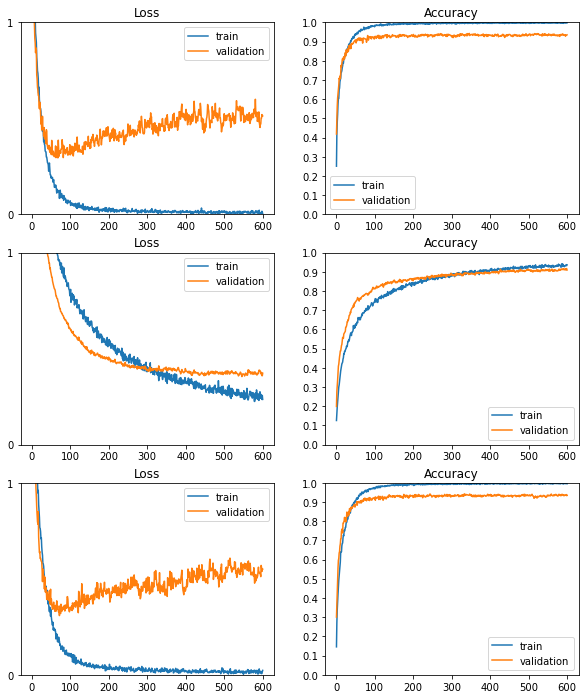

In [115]:
NetworksPlotUtils.plot_models_loss_acc_history(models_history, 
                                               min_loss=0, max_loss=1, 
                                               step_loss=1, step_acc=0.1,
                                               min_acc=0, max_acc=1)

In [119]:
## with more units
my_models = K.models.Sequential()
my_models.add(input_normalization_layer)
my_models.add(K.layers.Dense(256*0.75, activation='relu', input_shape=(data.shape[1],)))
my_models.add(K.layers.Dropout(droupout_value))
my_models.add(K.layers.Dense(128*0.75, activation='relu'))
my_models.add(K.layers.Dropout(droupout_value))
my_models.add(K.layers.Dense(64*0.75, activation='relu'))
my_models.add(K.layers.Dropout(droupout_value))
my_models.add(K.layers.Dense(64*0.75, activation='relu'))
my_models.add(K.layers.Dropout(droupout_value))
my_models.add(K.layers.Dense(32*0.75, activation='relu'))
my_models.add(K.layers.Dropout(droupout_value))
my_models.add(K.layers.Dense(labels.shape[1], activation='softmax'))

my_models.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])


models_history = my_models.fit(x_train, 
                                y_train, 
                                batch_size=512, 
                                epochs = 600,
                                validation_data=(x_val, y_val))

Epoch 1/600
7/7 [==============================] - 0s 52ms/step - loss: 2.2790 - accuracy: 0.1346 - val_loss: 2.1901 - val_accuracy: 0.2898
Epoch 2/600
7/7 [==============================] - 0s 26ms/step - loss: 2.1572 - accuracy: 0.2260 - val_loss: 2.0286 - val_accuracy: 0.3560
Epoch 3/600
7/7 [==============================] - 0s 23ms/step - loss: 2.0387 - accuracy: 0.2950 - val_loss: 1.8768 - val_accuracy: 0.4029
Epoch 4/600
7/7 [==============================] - 0s 25ms/step - loss: 1.9456 - accuracy: 0.3186 - val_loss: 1.7793 - val_accuracy: 0.4397
Epoch 5/600
7/7 [==============================] - 0s 32ms/step - loss: 1.8723 - accuracy: 0.3625 - val_loss: 1.6836 - val_accuracy: 0.4683
Epoch 6/600
7/7 [==============================] - 0s 27ms/step - loss: 1.7907 - accuracy: 0.3833 - val_loss: 1.5968 - val_accuracy: 0.4784
Epoch 7/600
7/7 [==============================] - 0s 23ms/step - loss: 1.7359 - accuracy: 0.4075 - val_loss: 1.5156 - val_accuracy: 0.4977
Epoch 8/600
7/7 [===

7/7 [==============================] - 0s 18ms/step - loss: 0.4081 - accuracy: 0.8691 - val_loss: 0.4116 - val_accuracy: 0.8721
Epoch 118/600
7/7 [==============================] - 0s 26ms/step - loss: 0.4353 - accuracy: 0.8642 - val_loss: 0.4110 - val_accuracy: 0.8758
Epoch 119/600
7/7 [==============================] - 0s 24ms/step - loss: 0.4153 - accuracy: 0.8706 - val_loss: 0.3998 - val_accuracy: 0.8804
Epoch 120/600
7/7 [==============================] - 0s 23ms/step - loss: 0.4069 - accuracy: 0.8734 - val_loss: 0.3979 - val_accuracy: 0.8822
Epoch 121/600
7/7 [==============================] - 0s 19ms/step - loss: 0.4198 - accuracy: 0.8773 - val_loss: 0.3966 - val_accuracy: 0.8813
Epoch 122/600
7/7 [==============================] - 0s 16ms/step - loss: 0.4105 - accuracy: 0.8706 - val_loss: 0.3980 - val_accuracy: 0.8786
Epoch 123/600
7/7 [==============================] - 0s 27ms/step - loss: 0.3894 - accuracy: 0.8810 - val_loss: 0.3840 - val_accuracy: 0.8850
Epoch 124/600
7/7 [=

Epoch 175/600
7/7 [==============================] - 0s 25ms/step - loss: 0.2793 - accuracy: 0.9157 - val_loss: 0.3419 - val_accuracy: 0.9043
Epoch 176/600
7/7 [==============================] - 0s 24ms/step - loss: 0.2759 - accuracy: 0.9175 - val_loss: 0.3520 - val_accuracy: 0.9071
Epoch 177/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2837 - accuracy: 0.9141 - val_loss: 0.3559 - val_accuracy: 0.9062
Epoch 178/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2658 - accuracy: 0.9218 - val_loss: 0.3554 - val_accuracy: 0.9006
Epoch 179/600
7/7 [==============================] - 0s 23ms/step - loss: 0.2806 - accuracy: 0.9184 - val_loss: 0.3431 - val_accuracy: 0.9025
Epoch 180/600
7/7 [==============================] - 0s 23ms/step - loss: 0.2684 - accuracy: 0.9193 - val_loss: 0.3607 - val_accuracy: 0.8997
Epoch 181/600
7/7 [==============================] - 0s 38ms/step - loss: 0.2728 - accuracy: 0.9230 - val_loss: 0.3479 - val_accuracy: 0.9089
Epoch 

Epoch 233/600
7/7 [==============================] - 0s 24ms/step - loss: 0.2127 - accuracy: 0.9408 - val_loss: 0.3376 - val_accuracy: 0.9172
Epoch 234/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1959 - accuracy: 0.9451 - val_loss: 0.3384 - val_accuracy: 0.9209
Epoch 235/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1790 - accuracy: 0.9509 - val_loss: 0.3409 - val_accuracy: 0.9172
Epoch 236/600
7/7 [==============================] - 0s 35ms/step - loss: 0.2061 - accuracy: 0.9427 - val_loss: 0.3518 - val_accuracy: 0.9172
Epoch 237/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1725 - accuracy: 0.9503 - val_loss: 0.3566 - val_accuracy: 0.9154
Epoch 238/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1909 - accuracy: 0.9457 - val_loss: 0.3402 - val_accuracy: 0.9163
Epoch 239/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1838 - accuracy: 0.9463 - val_loss: 0.3402 - val_accuracy: 0.9163
Epoch 

Epoch 291/600
7/7 [==============================] - 0s 34ms/step - loss: 0.1572 - accuracy: 0.9558 - val_loss: 0.3456 - val_accuracy: 0.9200
Epoch 292/600
7/7 [==============================] - 0s 33ms/step - loss: 0.1802 - accuracy: 0.9537 - val_loss: 0.3445 - val_accuracy: 0.9255
Epoch 293/600
7/7 [==============================] - 0s 27ms/step - loss: 0.1484 - accuracy: 0.9577 - val_loss: 0.3451 - val_accuracy: 0.9209
Epoch 294/600
7/7 [==============================] - 0s 33ms/step - loss: 0.1628 - accuracy: 0.9509 - val_loss: 0.3396 - val_accuracy: 0.9200
Epoch 295/600
7/7 [==============================] - 0s 65ms/step - loss: 0.1536 - accuracy: 0.9549 - val_loss: 0.3509 - val_accuracy: 0.9181
Epoch 296/600
7/7 [==============================] - 0s 18ms/step - loss: 0.1513 - accuracy: 0.9592 - val_loss: 0.3529 - val_accuracy: 0.9227
Epoch 297/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1484 - accuracy: 0.9611 - val_loss: 0.3537 - val_accuracy: 0.9163
Epoch 

Epoch 349/600
7/7 [==============================] - 0s 18ms/step - loss: 0.1378 - accuracy: 0.9626 - val_loss: 0.3709 - val_accuracy: 0.9255
Epoch 350/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1467 - accuracy: 0.9620 - val_loss: 0.3689 - val_accuracy: 0.9227
Epoch 351/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1385 - accuracy: 0.9675 - val_loss: 0.3478 - val_accuracy: 0.9264
Epoch 352/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1492 - accuracy: 0.9629 - val_loss: 0.3466 - val_accuracy: 0.9246
Epoch 353/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1319 - accuracy: 0.9638 - val_loss: 0.3486 - val_accuracy: 0.9282
Epoch 354/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1381 - accuracy: 0.9632 - val_loss: 0.3572 - val_accuracy: 0.9246
Epoch 355/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1150 - accuracy: 0.9684 - val_loss: 0.3501 - val_accuracy: 0.9282
Epoch 

Epoch 407/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1071 - accuracy: 0.9721 - val_loss: 0.3664 - val_accuracy: 0.9273
Epoch 408/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1127 - accuracy: 0.9712 - val_loss: 0.3702 - val_accuracy: 0.9209
Epoch 409/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1083 - accuracy: 0.9709 - val_loss: 0.3563 - val_accuracy: 0.9301
Epoch 410/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0994 - accuracy: 0.9745 - val_loss: 0.3714 - val_accuracy: 0.9282
Epoch 411/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0981 - accuracy: 0.9724 - val_loss: 0.3786 - val_accuracy: 0.9255
Epoch 412/600
7/7 [==============================] - 0s 25ms/step - loss: 0.1145 - accuracy: 0.9739 - val_loss: 0.3751 - val_accuracy: 0.9273
Epoch 413/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1211 - accuracy: 0.9718 - val_loss: 0.3916 - val_accuracy: 0.9227
Epoch 

Epoch 465/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1142 - accuracy: 0.9733 - val_loss: 0.3902 - val_accuracy: 0.9292
Epoch 466/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0845 - accuracy: 0.9764 - val_loss: 0.3850 - val_accuracy: 0.9255
Epoch 467/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0993 - accuracy: 0.9749 - val_loss: 0.3828 - val_accuracy: 0.9273
Epoch 468/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1071 - accuracy: 0.9715 - val_loss: 0.3690 - val_accuracy: 0.9273
Epoch 469/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1066 - accuracy: 0.9749 - val_loss: 0.3770 - val_accuracy: 0.9282
Epoch 470/600
7/7 [==============================] - 0s 27ms/step - loss: 0.0839 - accuracy: 0.9810 - val_loss: 0.3694 - val_accuracy: 0.9292
Epoch 471/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1060 - accuracy: 0.9755 - val_loss: 0.3621 - val_accuracy: 0.9255
Epoch 

Epoch 523/600
7/7 [==============================] - 0s 24ms/step - loss: 0.0792 - accuracy: 0.9779 - val_loss: 0.4006 - val_accuracy: 0.9236
Epoch 524/600
7/7 [==============================] - 0s 23ms/step - loss: 0.0795 - accuracy: 0.9801 - val_loss: 0.3985 - val_accuracy: 0.9264
Epoch 525/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0889 - accuracy: 0.9755 - val_loss: 0.4002 - val_accuracy: 0.9255
Epoch 526/600
7/7 [==============================] - 0s 25ms/step - loss: 0.0916 - accuracy: 0.9764 - val_loss: 0.4088 - val_accuracy: 0.9264
Epoch 527/600
7/7 [==============================] - 0s 24ms/step - loss: 0.0906 - accuracy: 0.9779 - val_loss: 0.4081 - val_accuracy: 0.9236
Epoch 528/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0969 - accuracy: 0.9788 - val_loss: 0.3981 - val_accuracy: 0.9264
Epoch 529/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0935 - accuracy: 0.9752 - val_loss: 0.3957 - val_accuracy: 0.9273
Epoch 

Epoch 581/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0880 - accuracy: 0.9795 - val_loss: 0.3768 - val_accuracy: 0.9310
Epoch 582/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0880 - accuracy: 0.9773 - val_loss: 0.3850 - val_accuracy: 0.9319
Epoch 583/600
7/7 [==============================] - 0s 24ms/step - loss: 0.0894 - accuracy: 0.9804 - val_loss: 0.3865 - val_accuracy: 0.9301
Epoch 584/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0782 - accuracy: 0.9807 - val_loss: 0.3761 - val_accuracy: 0.9338
Epoch 585/600
7/7 [==============================] - 0s 30ms/step - loss: 0.0922 - accuracy: 0.9770 - val_loss: 0.3990 - val_accuracy: 0.9282
Epoch 586/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0877 - accuracy: 0.9770 - val_loss: 0.3913 - val_accuracy: 0.9282
Epoch 587/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0860 - accuracy: 0.9801 - val_loss: 0.3915 - val_accuracy: 0.9273
Epoch 

At minimizer of train's loss (i = 592): loss = 0.06; acc = 0.98
At minimizer of validations's loss (i = 198): loss = 0.32; acc = 0.93
At maximizer of train's accuracy (i = 556): loss = 0.07; acc = 0.99
At maximizer of validations's accuracy (i = 575):  loss = 0.40; acc = 0.94


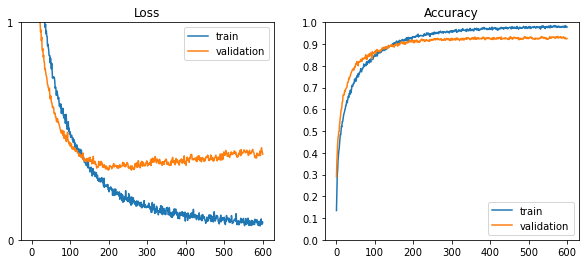

In [120]:
NetworksPlotUtils.plot_models_loss_acc_history(models_history, 
                                               min_loss=0, max_loss=1, 
                                               step_loss=1, step_acc=0.1,
                                               min_acc=0, max_acc=1)

The model with the same number of layers, but with a lower number of units per layer by a factor 0.75 was selected

Now let's test the network with different values of dropout

In [121]:
dropout_list = [0.15, 0.2, 0.25]
base_model_history = list()

for dropout_value in dropout_list:

    ## with less units
    base_model = K.models.Sequential()
    base_model.add(input_normalization_layer)
    base_model.add(K.layers.Dense(256*0.75, activation='relu', input_shape=(data.shape[1],)))
    base_model.add(K.layers.Dropout(droupout_value))
    base_model.add(K.layers.Dense(128*0.75, activation='relu'))
    base_model.add(K.layers.Dropout(droupout_value))
    base_model.add(K.layers.Dense(64*0.75, activation='relu'))
    base_model.add(K.layers.Dropout(droupout_value))
    base_model.add(K.layers.Dense(64*0.75, activation='relu'))
    base_model.add(K.layers.Dropout(droupout_value))
    base_model.add(K.layers.Dense(32*0.75, activation='relu'))
    base_model.add(K.layers.Dropout(droupout_value))
    base_model.add(K.layers.Dense(labels.shape[1], activation='softmax'))
    
    base_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


    base_model_history.append( base_model.fit(x_train, 
                                    y_train, 
                                    batch_size=512, 
                                    epochs = 600,
                                    validation_data=(x_val, y_val)) )

Epoch 1/600
7/7 [==============================] - 0s 54ms/step - loss: 2.2285 - accuracy: 0.1585 - val_loss: 2.1154 - val_accuracy: 0.3027
Epoch 2/600
7/7 [==============================] - 0s 18ms/step - loss: 2.1126 - accuracy: 0.2343 - val_loss: 1.9637 - val_accuracy: 0.3312
Epoch 3/600
7/7 [==============================] - 0s 18ms/step - loss: 2.0202 - accuracy: 0.2705 - val_loss: 1.8683 - val_accuracy: 0.3542
Epoch 4/600
7/7 [==============================] - 0s 22ms/step - loss: 1.9376 - accuracy: 0.3027 - val_loss: 1.7484 - val_accuracy: 0.3781
Epoch 5/600
7/7 [==============================] - 0s 24ms/step - loss: 1.8394 - accuracy: 0.3576 - val_loss: 1.6469 - val_accuracy: 0.4333
Epoch 6/600
7/7 [==============================] - 0s 23ms/step - loss: 1.7731 - accuracy: 0.3717 - val_loss: 1.5610 - val_accuracy: 0.5041
Epoch 7/600
7/7 [==============================] - 0s 22ms/step - loss: 1.7169 - accuracy: 0.3956 - val_loss: 1.4978 - val_accuracy: 0.5235
Epoch 8/600
7/7 [===

7/7 [==============================] - 0s 43ms/step - loss: 0.4137 - accuracy: 0.8709 - val_loss: 0.4071 - val_accuracy: 0.8795
Epoch 118/600
7/7 [==============================] - 0s 30ms/step - loss: 0.4065 - accuracy: 0.8764 - val_loss: 0.4046 - val_accuracy: 0.8841
Epoch 119/600
7/7 [==============================] - 0s 28ms/step - loss: 0.4228 - accuracy: 0.8681 - val_loss: 0.4013 - val_accuracy: 0.8813
Epoch 120/600
7/7 [==============================] - 0s 34ms/step - loss: 0.3862 - accuracy: 0.8853 - val_loss: 0.3980 - val_accuracy: 0.8813
Epoch 121/600
7/7 [==============================] - 0s 24ms/step - loss: 0.4020 - accuracy: 0.8813 - val_loss: 0.4089 - val_accuracy: 0.8721
Epoch 122/600
7/7 [==============================] - 0s 19ms/step - loss: 0.3929 - accuracy: 0.8780 - val_loss: 0.4032 - val_accuracy: 0.8832
Epoch 123/600
7/7 [==============================] - 0s 23ms/step - loss: 0.4021 - accuracy: 0.8789 - val_loss: 0.3930 - val_accuracy: 0.8859
Epoch 124/600
7/7 [=

Epoch 175/600
7/7 [==============================] - 0s 43ms/step - loss: 0.2511 - accuracy: 0.9276 - val_loss: 0.3528 - val_accuracy: 0.9089
Epoch 176/600
7/7 [==============================] - 0s 17ms/step - loss: 0.2689 - accuracy: 0.9200 - val_loss: 0.3415 - val_accuracy: 0.9052
Epoch 177/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2752 - accuracy: 0.9197 - val_loss: 0.3417 - val_accuracy: 0.9080
Epoch 178/600
7/7 [==============================] - 0s 21ms/step - loss: 0.2748 - accuracy: 0.9163 - val_loss: 0.3298 - val_accuracy: 0.9117
Epoch 179/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2638 - accuracy: 0.9154 - val_loss: 0.3339 - val_accuracy: 0.9089
Epoch 180/600
7/7 [==============================] - 0s 26ms/step - loss: 0.2737 - accuracy: 0.9190 - val_loss: 0.3224 - val_accuracy: 0.9154
Epoch 181/600
7/7 [==============================] - 0s 36ms/step - loss: 0.2555 - accuracy: 0.9261 - val_loss: 0.3289 - val_accuracy: 0.9181
Epoch 

Epoch 233/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2018 - accuracy: 0.9448 - val_loss: 0.3204 - val_accuracy: 0.9246
Epoch 234/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1945 - accuracy: 0.9460 - val_loss: 0.3358 - val_accuracy: 0.9190
Epoch 235/600
7/7 [==============================] - 0s 18ms/step - loss: 0.1986 - accuracy: 0.9436 - val_loss: 0.3270 - val_accuracy: 0.9227
Epoch 236/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2136 - accuracy: 0.9313 - val_loss: 0.3217 - val_accuracy: 0.9200
Epoch 237/600
7/7 [==============================] - 0s 31ms/step - loss: 0.1939 - accuracy: 0.9411 - val_loss: 0.3132 - val_accuracy: 0.9200
Epoch 238/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1819 - accuracy: 0.9451 - val_loss: 0.3238 - val_accuracy: 0.9172
Epoch 239/600
7/7 [==============================] - 0s 32ms/step - loss: 0.1865 - accuracy: 0.9454 - val_loss: 0.3229 - val_accuracy: 0.9190
Epoch 

Epoch 291/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1384 - accuracy: 0.9629 - val_loss: 0.3425 - val_accuracy: 0.9264
Epoch 292/600
7/7 [==============================] - 0s 26ms/step - loss: 0.1494 - accuracy: 0.9583 - val_loss: 0.3360 - val_accuracy: 0.9301
Epoch 293/600
7/7 [==============================] - 0s 26ms/step - loss: 0.1483 - accuracy: 0.9565 - val_loss: 0.3439 - val_accuracy: 0.9264
Epoch 294/600
7/7 [==============================] - 0s 41ms/step - loss: 0.1778 - accuracy: 0.9522 - val_loss: 0.3300 - val_accuracy: 0.9227
Epoch 295/600
7/7 [==============================] - 0s 36ms/step - loss: 0.1350 - accuracy: 0.9647 - val_loss: 0.3389 - val_accuracy: 0.9246
Epoch 296/600
7/7 [==============================] - 0s 25ms/step - loss: 0.1573 - accuracy: 0.9601 - val_loss: 0.3344 - val_accuracy: 0.9227
Epoch 297/600
7/7 [==============================] - 0s 26ms/step - loss: 0.1597 - accuracy: 0.9537 - val_loss: 0.3266 - val_accuracy: 0.9282
Epoch 

Epoch 349/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1494 - accuracy: 0.9595 - val_loss: 0.3530 - val_accuracy: 0.9236
Epoch 350/600
7/7 [==============================] - 0s 35ms/step - loss: 0.1243 - accuracy: 0.9690 - val_loss: 0.3438 - val_accuracy: 0.9218
Epoch 351/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1435 - accuracy: 0.9595 - val_loss: 0.3399 - val_accuracy: 0.9227
Epoch 352/600
7/7 [==============================] - 0s 29ms/step - loss: 0.1302 - accuracy: 0.9653 - val_loss: 0.3338 - val_accuracy: 0.9236
Epoch 353/600
7/7 [==============================] - 0s 43ms/step - loss: 0.1298 - accuracy: 0.9657 - val_loss: 0.3304 - val_accuracy: 0.9218
Epoch 354/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1344 - accuracy: 0.9626 - val_loss: 0.3333 - val_accuracy: 0.9255
Epoch 355/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1169 - accuracy: 0.9681 - val_loss: 0.3309 - val_accuracy: 0.9227
Epoch 

Epoch 407/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0943 - accuracy: 0.9749 - val_loss: 0.3611 - val_accuracy: 0.9282
Epoch 408/600
7/7 [==============================] - 0s 27ms/step - loss: 0.1095 - accuracy: 0.9727 - val_loss: 0.3504 - val_accuracy: 0.9301
Epoch 409/600
7/7 [==============================] - 0s 32ms/step - loss: 0.1172 - accuracy: 0.9727 - val_loss: 0.3450 - val_accuracy: 0.9282
Epoch 410/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1142 - accuracy: 0.9727 - val_loss: 0.3503 - val_accuracy: 0.9310
Epoch 411/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1151 - accuracy: 0.9696 - val_loss: 0.3302 - val_accuracy: 0.9292
Epoch 412/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0921 - accuracy: 0.9718 - val_loss: 0.3687 - val_accuracy: 0.9200
Epoch 413/600
7/7 [==============================] - 0s 33ms/step - loss: 0.1115 - accuracy: 0.9712 - val_loss: 0.3546 - val_accuracy: 0.9264
Epoch 

Epoch 465/600
7/7 [==============================] - 0s 30ms/step - loss: 0.0997 - accuracy: 0.9739 - val_loss: 0.3582 - val_accuracy: 0.9236
Epoch 466/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1032 - accuracy: 0.9712 - val_loss: 0.3549 - val_accuracy: 0.9218
Epoch 467/600
7/7 [==============================] - 0s 34ms/step - loss: 0.1005 - accuracy: 0.9764 - val_loss: 0.3500 - val_accuracy: 0.9273
Epoch 468/600
7/7 [==============================] - 0s 29ms/step - loss: 0.0809 - accuracy: 0.9791 - val_loss: 0.3460 - val_accuracy: 0.9282
Epoch 469/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0774 - accuracy: 0.9782 - val_loss: 0.3423 - val_accuracy: 0.9292
Epoch 470/600
7/7 [==============================] - 0s 47ms/step - loss: 0.0979 - accuracy: 0.9752 - val_loss: 0.3606 - val_accuracy: 0.9264
Epoch 471/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0931 - accuracy: 0.9776 - val_loss: 0.3663 - val_accuracy: 0.9246
Epoch 

Epoch 523/600
7/7 [==============================] - 0s 30ms/step - loss: 0.0797 - accuracy: 0.9804 - val_loss: 0.3925 - val_accuracy: 0.9227
Epoch 524/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0721 - accuracy: 0.9822 - val_loss: 0.3947 - val_accuracy: 0.9181
Epoch 525/600
7/7 [==============================] - 0s 24ms/step - loss: 0.0991 - accuracy: 0.9755 - val_loss: 0.3861 - val_accuracy: 0.9264
Epoch 526/600
7/7 [==============================] - 0s 26ms/step - loss: 0.0895 - accuracy: 0.9813 - val_loss: 0.3912 - val_accuracy: 0.9255
Epoch 527/600
7/7 [==============================] - 0s 30ms/step - loss: 0.0864 - accuracy: 0.9795 - val_loss: 0.3926 - val_accuracy: 0.9255
Epoch 528/600
7/7 [==============================] - 0s 25ms/step - loss: 0.0858 - accuracy: 0.9804 - val_loss: 0.3938 - val_accuracy: 0.9236
Epoch 529/600
7/7 [==============================] - 0s 29ms/step - loss: 0.0921 - accuracy: 0.9715 - val_loss: 0.3826 - val_accuracy: 0.9227
Epoch 

Epoch 581/600
7/7 [==============================] - 0s 43ms/step - loss: 0.0702 - accuracy: 0.9807 - val_loss: 0.3522 - val_accuracy: 0.9310
Epoch 582/600
7/7 [==============================] - 0s 29ms/step - loss: 0.0846 - accuracy: 0.9761 - val_loss: 0.3749 - val_accuracy: 0.9282
Epoch 583/600
7/7 [==============================] - 0s 26ms/step - loss: 0.0819 - accuracy: 0.9785 - val_loss: 0.3749 - val_accuracy: 0.9264
Epoch 584/600
7/7 [==============================] - 0s 31ms/step - loss: 0.0754 - accuracy: 0.9801 - val_loss: 0.3689 - val_accuracy: 0.9282
Epoch 585/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0949 - accuracy: 0.9764 - val_loss: 0.3601 - val_accuracy: 0.9310
Epoch 586/600
7/7 [==============================] - 0s 27ms/step - loss: 0.0987 - accuracy: 0.9801 - val_loss: 0.3708 - val_accuracy: 0.9328
Epoch 587/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0945 - accuracy: 0.9798 - val_loss: 0.3471 - val_accuracy: 0.9347
Epoch 

7/7 [==============================] - 0s 24ms/step - loss: 0.9731 - accuracy: 0.6845 - val_loss: 0.7808 - val_accuracy: 0.7424
Epoch 40/600
7/7 [==============================] - 0s 40ms/step - loss: 0.9710 - accuracy: 0.6854 - val_loss: 0.7737 - val_accuracy: 0.7525
Epoch 41/600
7/7 [==============================] - 0s 27ms/step - loss: 0.9416 - accuracy: 0.6970 - val_loss: 0.7579 - val_accuracy: 0.7489
Epoch 42/600
7/7 [==============================] - 0s 30ms/step - loss: 0.9265 - accuracy: 0.7078 - val_loss: 0.7533 - val_accuracy: 0.7516
Epoch 43/600
7/7 [==============================] - 0s 33ms/step - loss: 0.9134 - accuracy: 0.6967 - val_loss: 0.7370 - val_accuracy: 0.7580
Epoch 44/600
7/7 [==============================] - 0s 34ms/step - loss: 0.8796 - accuracy: 0.7133 - val_loss: 0.7361 - val_accuracy: 0.7571
Epoch 45/600
7/7 [==============================] - 0s 31ms/step - loss: 0.8935 - accuracy: 0.7185 - val_loss: 0.7225 - val_accuracy: 0.7654
Epoch 46/600
7/7 [========

Epoch 155/600
7/7 [==============================] - 0s 19ms/step - loss: 0.3086 - accuracy: 0.9108 - val_loss: 0.3501 - val_accuracy: 0.8979
Epoch 156/600
7/7 [==============================] - 0s 18ms/step - loss: 0.3006 - accuracy: 0.9102 - val_loss: 0.3323 - val_accuracy: 0.9052
Epoch 157/600
7/7 [==============================] - 0s 34ms/step - loss: 0.2967 - accuracy: 0.9105 - val_loss: 0.3190 - val_accuracy: 0.9098
Epoch 158/600
7/7 [==============================] - 0s 38ms/step - loss: 0.2918 - accuracy: 0.9163 - val_loss: 0.3247 - val_accuracy: 0.9052
Epoch 159/600
7/7 [==============================] - 0s 35ms/step - loss: 0.2775 - accuracy: 0.9175 - val_loss: 0.3419 - val_accuracy: 0.8988
Epoch 160/600
7/7 [==============================] - 0s 32ms/step - loss: 0.2801 - accuracy: 0.9221 - val_loss: 0.3517 - val_accuracy: 0.8924
Epoch 161/600
7/7 [==============================] - 0s 29ms/step - loss: 0.2987 - accuracy: 0.9169 - val_loss: 0.3292 - val_accuracy: 0.9006
Epoch 

Epoch 213/600
7/7 [==============================] - 0s 30ms/step - loss: 0.2041 - accuracy: 0.9396 - val_loss: 0.3233 - val_accuracy: 0.9089
Epoch 214/600
7/7 [==============================] - 0s 23ms/step - loss: 0.2202 - accuracy: 0.9414 - val_loss: 0.3152 - val_accuracy: 0.9154
Epoch 215/600
7/7 [==============================] - 0s 40ms/step - loss: 0.2136 - accuracy: 0.9439 - val_loss: 0.3243 - val_accuracy: 0.9108
Epoch 216/600
7/7 [==============================] - 0s 31ms/step - loss: 0.2100 - accuracy: 0.9442 - val_loss: 0.3084 - val_accuracy: 0.9163
Epoch 217/600
7/7 [==============================] - 0s 37ms/step - loss: 0.2069 - accuracy: 0.9405 - val_loss: 0.3231 - val_accuracy: 0.9108
Epoch 218/600
7/7 [==============================] - 0s 35ms/step - loss: 0.2111 - accuracy: 0.9420 - val_loss: 0.3097 - val_accuracy: 0.9172
Epoch 219/600
7/7 [==============================] - 0s 27ms/step - loss: 0.2037 - accuracy: 0.9417 - val_loss: 0.3257 - val_accuracy: 0.9144
Epoch 

Epoch 271/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1558 - accuracy: 0.9558 - val_loss: 0.3352 - val_accuracy: 0.9200
Epoch 272/600
7/7 [==============================] - 0s 25ms/step - loss: 0.1513 - accuracy: 0.9574 - val_loss: 0.3259 - val_accuracy: 0.9209
Epoch 273/600
7/7 [==============================] - 0s 33ms/step - loss: 0.1835 - accuracy: 0.9494 - val_loss: 0.3186 - val_accuracy: 0.9236
Epoch 274/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1402 - accuracy: 0.9604 - val_loss: 0.3135 - val_accuracy: 0.9227
Epoch 275/600
7/7 [==============================] - 0s 27ms/step - loss: 0.1578 - accuracy: 0.9528 - val_loss: 0.3212 - val_accuracy: 0.9264
Epoch 276/600
7/7 [==============================] - 0s 42ms/step - loss: 0.1750 - accuracy: 0.9519 - val_loss: 0.3080 - val_accuracy: 0.9255
Epoch 277/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1592 - accuracy: 0.9580 - val_loss: 0.3291 - val_accuracy: 0.9255
Epoch 

Epoch 329/600
7/7 [==============================] - 0s 37ms/step - loss: 0.1118 - accuracy: 0.9706 - val_loss: 0.3200 - val_accuracy: 0.9273
Epoch 330/600
7/7 [==============================] - 0s 38ms/step - loss: 0.1266 - accuracy: 0.9647 - val_loss: 0.3110 - val_accuracy: 0.9255
Epoch 331/600
7/7 [==============================] - 0s 27ms/step - loss: 0.1331 - accuracy: 0.9644 - val_loss: 0.3222 - val_accuracy: 0.9264
Epoch 332/600
7/7 [==============================] - 0s 34ms/step - loss: 0.1383 - accuracy: 0.9623 - val_loss: 0.3326 - val_accuracy: 0.9255
Epoch 333/600
7/7 [==============================] - 0s 26ms/step - loss: 0.1261 - accuracy: 0.9690 - val_loss: 0.3227 - val_accuracy: 0.9292
Epoch 334/600
7/7 [==============================] - 0s 29ms/step - loss: 0.1328 - accuracy: 0.9660 - val_loss: 0.3227 - val_accuracy: 0.9301
Epoch 335/600
7/7 [==============================] - 0s 31ms/step - loss: 0.1453 - accuracy: 0.9629 - val_loss: 0.3337 - val_accuracy: 0.9246
Epoch 

Epoch 387/600
7/7 [==============================] - 0s 32ms/step - loss: 0.1309 - accuracy: 0.9672 - val_loss: 0.3293 - val_accuracy: 0.9264
Epoch 388/600
7/7 [==============================] - 0s 32ms/step - loss: 0.1096 - accuracy: 0.9730 - val_loss: 0.3346 - val_accuracy: 0.9282
Epoch 389/600
7/7 [==============================] - 0s 41ms/step - loss: 0.1215 - accuracy: 0.9721 - val_loss: 0.3273 - val_accuracy: 0.9264
Epoch 390/600
7/7 [==============================] - 0s 29ms/step - loss: 0.1128 - accuracy: 0.9678 - val_loss: 0.3317 - val_accuracy: 0.9282
Epoch 391/600
7/7 [==============================] - 0s 28ms/step - loss: 0.1206 - accuracy: 0.9703 - val_loss: 0.3348 - val_accuracy: 0.9246
Epoch 392/600
7/7 [==============================] - 0s 29ms/step - loss: 0.1014 - accuracy: 0.9706 - val_loss: 0.3161 - val_accuracy: 0.9282
Epoch 393/600
7/7 [==============================] - 0s 36ms/step - loss: 0.1211 - accuracy: 0.9660 - val_loss: 0.3258 - val_accuracy: 0.9310
Epoch 

Epoch 445/600
7/7 [==============================] - 0s 33ms/step - loss: 0.1049 - accuracy: 0.9709 - val_loss: 0.3285 - val_accuracy: 0.9292
Epoch 446/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1035 - accuracy: 0.9733 - val_loss: 0.3502 - val_accuracy: 0.9292
Epoch 447/600
7/7 [==============================] - 0s 34ms/step - loss: 0.1012 - accuracy: 0.9721 - val_loss: 0.3467 - val_accuracy: 0.9273
Epoch 448/600
7/7 [==============================] - 0s 24ms/step - loss: 0.0897 - accuracy: 0.9773 - val_loss: 0.3394 - val_accuracy: 0.9282
Epoch 449/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0870 - accuracy: 0.9764 - val_loss: 0.3404 - val_accuracy: 0.9319
Epoch 450/600
7/7 [==============================] - 0s 32ms/step - loss: 0.0951 - accuracy: 0.9770 - val_loss: 0.3375 - val_accuracy: 0.9292
Epoch 451/600
7/7 [==============================] - 0s 35ms/step - loss: 0.1102 - accuracy: 0.9718 - val_loss: 0.3271 - val_accuracy: 0.9338
Epoch 

Epoch 503/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0876 - accuracy: 0.9779 - val_loss: 0.3804 - val_accuracy: 0.9338
Epoch 504/600
7/7 [==============================] - 0s 46ms/step - loss: 0.0660 - accuracy: 0.9841 - val_loss: 0.3624 - val_accuracy: 0.9356
Epoch 505/600
7/7 [==============================] - 0s 48ms/step - loss: 0.0857 - accuracy: 0.9767 - val_loss: 0.3835 - val_accuracy: 0.9310
Epoch 506/600
7/7 [==============================] - 0s 42ms/step - loss: 0.0875 - accuracy: 0.9782 - val_loss: 0.3581 - val_accuracy: 0.9310
Epoch 507/600
7/7 [==============================] - 0s 47ms/step - loss: 0.0830 - accuracy: 0.9776 - val_loss: 0.3456 - val_accuracy: 0.9347
Epoch 508/600
7/7 [==============================] - 0s 46ms/step - loss: 0.0785 - accuracy: 0.9816 - val_loss: 0.3643 - val_accuracy: 0.9301
Epoch 509/600
7/7 [==============================] - 0s 38ms/step - loss: 0.0866 - accuracy: 0.9782 - val_loss: 0.3567 - val_accuracy: 0.9319
Epoch 

Epoch 561/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0836 - accuracy: 0.9773 - val_loss: 0.3383 - val_accuracy: 0.9356
Epoch 562/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0830 - accuracy: 0.9791 - val_loss: 0.3494 - val_accuracy: 0.9301
Epoch 563/600
7/7 [==============================] - 0s 35ms/step - loss: 0.0608 - accuracy: 0.9822 - val_loss: 0.3596 - val_accuracy: 0.9328
Epoch 564/600
7/7 [==============================] - 0s 29ms/step - loss: 0.0807 - accuracy: 0.9816 - val_loss: 0.3578 - val_accuracy: 0.9292
Epoch 565/600
7/7 [==============================] - 0s 34ms/step - loss: 0.0943 - accuracy: 0.9752 - val_loss: 0.3644 - val_accuracy: 0.9319
Epoch 566/600
7/7 [==============================] - 0s 28ms/step - loss: 0.0811 - accuracy: 0.9798 - val_loss: 0.3665 - val_accuracy: 0.9310
Epoch 567/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0778 - accuracy: 0.9804 - val_loss: 0.3610 - val_accuracy: 0.9338
Epoch 

Epoch 19/600
7/7 [==============================] - 0s 23ms/step - loss: 1.3526 - accuracy: 0.5474 - val_loss: 1.1165 - val_accuracy: 0.6743
Epoch 20/600
7/7 [==============================] - 0s 22ms/step - loss: 1.3076 - accuracy: 0.5710 - val_loss: 1.0822 - val_accuracy: 0.6872
Epoch 21/600
7/7 [==============================] - 0s 22ms/step - loss: 1.2756 - accuracy: 0.5882 - val_loss: 1.0732 - val_accuracy: 0.6697
Epoch 22/600
7/7 [==============================] - 0s 29ms/step - loss: 1.2525 - accuracy: 0.5894 - val_loss: 1.0366 - val_accuracy: 0.6900
Epoch 23/600
7/7 [==============================] - 0s 26ms/step - loss: 1.2793 - accuracy: 0.5710 - val_loss: 1.0483 - val_accuracy: 0.6670
Epoch 24/600
7/7 [==============================] - 0s 25ms/step - loss: 1.2454 - accuracy: 0.5866 - val_loss: 1.0062 - val_accuracy: 0.6909
Epoch 25/600
7/7 [==============================] - 0s 28ms/step - loss: 1.1847 - accuracy: 0.6148 - val_loss: 0.9850 - val_accuracy: 0.6891
Epoch 26/600


Epoch 135/600
7/7 [==============================] - 0s 18ms/step - loss: 0.3701 - accuracy: 0.8829 - val_loss: 0.3609 - val_accuracy: 0.8970
Epoch 136/600
7/7 [==============================] - 0s 21ms/step - loss: 0.3699 - accuracy: 0.8893 - val_loss: 0.3589 - val_accuracy: 0.8924
Epoch 137/600
7/7 [==============================] - 0s 16ms/step - loss: 0.3678 - accuracy: 0.8951 - val_loss: 0.3494 - val_accuracy: 0.8970
Epoch 138/600
7/7 [==============================] - 0s 21ms/step - loss: 0.3463 - accuracy: 0.8964 - val_loss: 0.3642 - val_accuracy: 0.8951
Epoch 139/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3594 - accuracy: 0.8918 - val_loss: 0.3817 - val_accuracy: 0.8896
Epoch 140/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3456 - accuracy: 0.8899 - val_loss: 0.3539 - val_accuracy: 0.8970
Epoch 141/600
7/7 [==============================] - 0s 17ms/step - loss: 0.3467 - accuracy: 0.9019 - val_loss: 0.3690 - val_accuracy: 0.8878
Epoch 

Epoch 193/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2484 - accuracy: 0.9276 - val_loss: 0.3407 - val_accuracy: 0.9089
Epoch 194/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2639 - accuracy: 0.9221 - val_loss: 0.3354 - val_accuracy: 0.9089
Epoch 195/600
7/7 [==============================] - 0s 18ms/step - loss: 0.2483 - accuracy: 0.9292 - val_loss: 0.3309 - val_accuracy: 0.9052
Epoch 196/600
7/7 [==============================] - 0s 20ms/step - loss: 0.2437 - accuracy: 0.9301 - val_loss: 0.3226 - val_accuracy: 0.9117
Epoch 197/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2457 - accuracy: 0.9236 - val_loss: 0.3277 - val_accuracy: 0.9154
Epoch 198/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2476 - accuracy: 0.9243 - val_loss: 0.3209 - val_accuracy: 0.9163
Epoch 199/600
7/7 [==============================] - 0s 19ms/step - loss: 0.2450 - accuracy: 0.9276 - val_loss: 0.3356 - val_accuracy: 0.9108
Epoch 

Epoch 251/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1801 - accuracy: 0.9509 - val_loss: 0.3344 - val_accuracy: 0.9218
Epoch 252/600
7/7 [==============================] - 0s 15ms/step - loss: 0.1773 - accuracy: 0.9500 - val_loss: 0.3287 - val_accuracy: 0.9227
Epoch 253/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1735 - accuracy: 0.9509 - val_loss: 0.3368 - val_accuracy: 0.9282
Epoch 254/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1900 - accuracy: 0.9451 - val_loss: 0.3394 - val_accuracy: 0.9163
Epoch 255/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1945 - accuracy: 0.9469 - val_loss: 0.3526 - val_accuracy: 0.9126
Epoch 256/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1794 - accuracy: 0.9479 - val_loss: 0.3412 - val_accuracy: 0.9172
Epoch 257/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1780 - accuracy: 0.9448 - val_loss: 0.3285 - val_accuracy: 0.9190
Epoch 

Epoch 309/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1542 - accuracy: 0.9552 - val_loss: 0.3356 - val_accuracy: 0.9246
Epoch 310/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1582 - accuracy: 0.9574 - val_loss: 0.3410 - val_accuracy: 0.9200
Epoch 311/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1386 - accuracy: 0.9632 - val_loss: 0.3341 - val_accuracy: 0.9255
Epoch 312/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1765 - accuracy: 0.9531 - val_loss: 0.3356 - val_accuracy: 0.9273
Epoch 313/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1415 - accuracy: 0.9617 - val_loss: 0.3324 - val_accuracy: 0.9292
Epoch 314/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1259 - accuracy: 0.9620 - val_loss: 0.3412 - val_accuracy: 0.9328
Epoch 315/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1291 - accuracy: 0.9650 - val_loss: 0.3492 - val_accuracy: 0.9319
Epoch 

Epoch 367/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1342 - accuracy: 0.9650 - val_loss: 0.3095 - val_accuracy: 0.9365
Epoch 368/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1049 - accuracy: 0.9696 - val_loss: 0.3148 - val_accuracy: 0.9338
Epoch 369/600
7/7 [==============================] - 0s 23ms/step - loss: 0.1252 - accuracy: 0.9660 - val_loss: 0.3249 - val_accuracy: 0.9328
Epoch 370/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1186 - accuracy: 0.9644 - val_loss: 0.3407 - val_accuracy: 0.9347
Epoch 371/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1282 - accuracy: 0.9611 - val_loss: 0.3424 - val_accuracy: 0.9310
Epoch 372/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1144 - accuracy: 0.9703 - val_loss: 0.3535 - val_accuracy: 0.9255
Epoch 373/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1312 - accuracy: 0.9660 - val_loss: 0.3578 - val_accuracy: 0.9301
Epoch 

Epoch 425/600
7/7 [==============================] - 0s 24ms/step - loss: 0.1125 - accuracy: 0.9693 - val_loss: 0.3380 - val_accuracy: 0.9319
Epoch 426/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1334 - accuracy: 0.9644 - val_loss: 0.3223 - val_accuracy: 0.9319
Epoch 427/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0939 - accuracy: 0.9715 - val_loss: 0.3468 - val_accuracy: 0.9338
Epoch 428/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1050 - accuracy: 0.9672 - val_loss: 0.3436 - val_accuracy: 0.9347
Epoch 429/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1109 - accuracy: 0.9718 - val_loss: 0.3339 - val_accuracy: 0.9347
Epoch 430/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1097 - accuracy: 0.9718 - val_loss: 0.3550 - val_accuracy: 0.9301
Epoch 431/600
7/7 [==============================] - 0s 22ms/step - loss: 0.1051 - accuracy: 0.9709 - val_loss: 0.3521 - val_accuracy: 0.9301
Epoch 

Epoch 483/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0982 - accuracy: 0.9749 - val_loss: 0.3310 - val_accuracy: 0.9347
Epoch 484/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0869 - accuracy: 0.9782 - val_loss: 0.3336 - val_accuracy: 0.9347
Epoch 485/600
7/7 [==============================] - 0s 19ms/step - loss: 0.1005 - accuracy: 0.9724 - val_loss: 0.3493 - val_accuracy: 0.9338
Epoch 486/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0945 - accuracy: 0.9727 - val_loss: 0.3382 - val_accuracy: 0.9374
Epoch 487/600
7/7 [==============================] - 0s 21ms/step - loss: 0.1015 - accuracy: 0.9730 - val_loss: 0.3291 - val_accuracy: 0.9301
Epoch 488/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0987 - accuracy: 0.9755 - val_loss: 0.3097 - val_accuracy: 0.9393
Epoch 489/600
7/7 [==============================] - 0s 17ms/step - loss: 0.0772 - accuracy: 0.9779 - val_loss: 0.3058 - val_accuracy: 0.9384
Epoch 

Epoch 541/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0712 - accuracy: 0.9810 - val_loss: 0.3503 - val_accuracy: 0.9328
Epoch 542/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0790 - accuracy: 0.9779 - val_loss: 0.3617 - val_accuracy: 0.9338
Epoch 543/600
7/7 [==============================] - 0s 20ms/step - loss: 0.0816 - accuracy: 0.9813 - val_loss: 0.3726 - val_accuracy: 0.9328
Epoch 544/600
7/7 [==============================] - 0s 19ms/step - loss: 0.0659 - accuracy: 0.9828 - val_loss: 0.3665 - val_accuracy: 0.9273
Epoch 545/600
7/7 [==============================] - 0s 22ms/step - loss: 0.0768 - accuracy: 0.9785 - val_loss: 0.3714 - val_accuracy: 0.9273
Epoch 546/600
7/7 [==============================] - 0s 20ms/step - loss: 0.1054 - accuracy: 0.9776 - val_loss: 0.3581 - val_accuracy: 0.9338
Epoch 547/600
7/7 [==============================] - 0s 24ms/step - loss: 0.0773 - accuracy: 0.9798 - val_loss: 0.3563 - val_accuracy: 0.9356
Epoch 

Epoch 599/600
7/7 [==============================] - 0s 21ms/step - loss: 0.0921 - accuracy: 0.9788 - val_loss: 0.3753 - val_accuracy: 0.9319
Epoch 600/600
7/7 [==============================] - 0s 16ms/step - loss: 0.0744 - accuracy: 0.9798 - val_loss: 0.3910 - val_accuracy: 0.9310


Model 1
At minimizer of train's loss (i = 542): loss = 0.05; acc = 0.99
At minimizer of validations's loss (i = 193): loss = 0.31; acc = 0.93
At maximizer of train's accuracy (i = 542): loss = 0.05; acc = 0.99
At maximizer of validations's accuracy (i = 459):  loss = 0.35; acc = 0.93


Model 2
At minimizer of train's loss (i = 577): loss = 0.06; acc = 0.98
At minimizer of validations's loss (i = 225): loss = 0.29; acc = 0.93
At maximizer of train's accuracy (i = 489): loss = 0.07; acc = 0.99
At maximizer of validations's accuracy (i = 491):  loss = 0.35; acc = 0.94


Model 3
At minimizer of train's loss (i = 568): loss = 0.06; acc = 0.99
At minimizer of validations's loss (i = 285): loss = 0.30; acc = 0.93
At maximizer of train's accuracy (i = 568): loss = 0.06; acc = 0.99
At maximizer of validations's accuracy (i = 569):  loss = 0.35; acc = 0.94




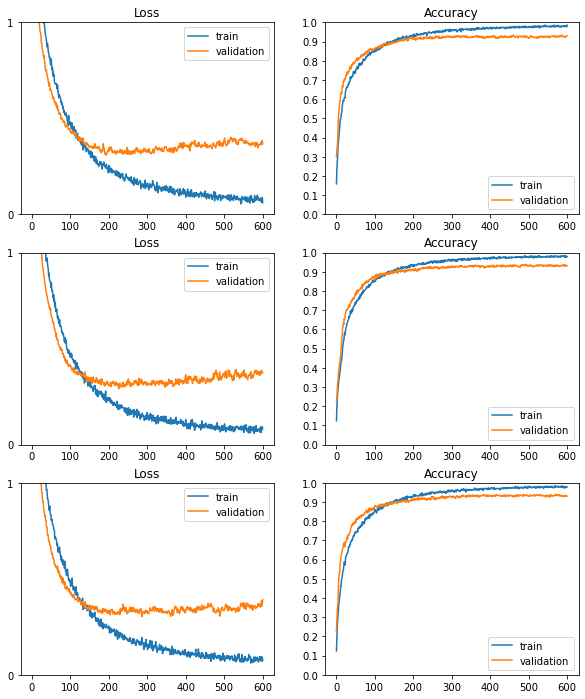

In [124]:
NetworksPlotUtils.plot_models_loss_acc_history(base_model_history, 
                                               min_loss=0, max_loss=1, 
                                               step_loss=1, step_acc=0.1,
                                               min_acc=0, max_acc=1)

## Final decision
 
A dropout of 0.2 will be used in the base model

# Test the model in the test dataset

The network will be finnaly trained with the **train and development dataset**. This approach has some advantages: 

**1** - More that is used in training 

**2** - It allows to check if the procedure used in parameters tunning (based on dev dataset) was reliable. If the performace of the consequent network is lower than previous, it means the tunning approach is not reliable 

In [126]:
type(x_train)

numpy.ndarray

In [130]:
droupout_value=0.2

## with less units
base_model = K.models.Sequential()
base_model.add(input_normalization_layer)
base_model.add(K.layers.Dense(256*0.75, activation='relu', input_shape=(data.shape[1],)))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(128*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(64*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(64*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(32*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(labels.shape[1], activation='softmax'))

base_model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

base_model_history = base_model.fit(np.concatenate((x_train,x_val)), 
                                    np.concatenate((y_train, y_val)), 
                                    batch_size=512, 
                                    epochs = 600,
                                    validation_data=(x_test, y_test)) 

Epoch 1/600
9/9 [==============================] - 0s 39ms/step - loss: 2.2430 - accuracy: 0.1578 - val_loss: 2.0691 - val_accuracy: 0.2824
Epoch 2/600
9/9 [==============================] - 0s 17ms/step - loss: 2.0929 - accuracy: 0.2321 - val_loss: 1.9218 - val_accuracy: 0.3606
Epoch 3/600
9/9 [==============================] - 0s 17ms/step - loss: 1.9826 - accuracy: 0.2955 - val_loss: 1.7936 - val_accuracy: 0.3910
Epoch 4/600
9/9 [==============================] - 0s 23ms/step - loss: 1.8866 - accuracy: 0.3351 - val_loss: 1.6759 - val_accuracy: 0.4489
Epoch 5/600
9/9 [==============================] - 0s 21ms/step - loss: 1.8005 - accuracy: 0.3756 - val_loss: 1.5625 - val_accuracy: 0.4885
Epoch 6/600
9/9 [==============================] - 0s 33ms/step - loss: 1.7217 - accuracy: 0.4069 - val_loss: 1.4777 - val_accuracy: 0.5483
Epoch 7/600
9/9 [==============================] - 0s 35ms/step - loss: 1.6333 - accuracy: 0.4372 - val_loss: 1.3906 - val_accuracy: 0.5704
Epoch 8/600
9/9 [===

9/9 [==============================] - 0s 21ms/step - loss: 0.3540 - accuracy: 0.8933 - val_loss: 0.3901 - val_accuracy: 0.8914
Epoch 118/600
9/9 [==============================] - 0s 21ms/step - loss: 0.3400 - accuracy: 0.8954 - val_loss: 0.3939 - val_accuracy: 0.8960
Epoch 119/600
9/9 [==============================] - 0s 22ms/step - loss: 0.3396 - accuracy: 0.8972 - val_loss: 0.3928 - val_accuracy: 0.8896
Epoch 120/600
9/9 [==============================] - 0s 21ms/step - loss: 0.3631 - accuracy: 0.8896 - val_loss: 0.3947 - val_accuracy: 0.8988
Epoch 121/600
9/9 [==============================] - 0s 20ms/step - loss: 0.3456 - accuracy: 0.8933 - val_loss: 0.3853 - val_accuracy: 0.8997
Epoch 122/600
9/9 [==============================] - 0s 22ms/step - loss: 0.3398 - accuracy: 0.8956 - val_loss: 0.3907 - val_accuracy: 0.8951
Epoch 123/600
9/9 [==============================] - 0s 17ms/step - loss: 0.3422 - accuracy: 0.8967 - val_loss: 0.3941 - val_accuracy: 0.8960
Epoch 124/600
9/9 [=

Epoch 175/600
9/9 [==============================] - 0s 32ms/step - loss: 0.2472 - accuracy: 0.9276 - val_loss: 0.3577 - val_accuracy: 0.9080
Epoch 176/600
9/9 [==============================] - 0s 24ms/step - loss: 0.2303 - accuracy: 0.9331 - val_loss: 0.3507 - val_accuracy: 0.9089
Epoch 177/600
9/9 [==============================] - 0s 19ms/step - loss: 0.2317 - accuracy: 0.9328 - val_loss: 0.3486 - val_accuracy: 0.9135
Epoch 178/600
9/9 [==============================] - 0s 19ms/step - loss: 0.2292 - accuracy: 0.9317 - val_loss: 0.3534 - val_accuracy: 0.9172
Epoch 179/600
9/9 [==============================] - 0s 24ms/step - loss: 0.2418 - accuracy: 0.9289 - val_loss: 0.3594 - val_accuracy: 0.9098
Epoch 180/600
9/9 [==============================] - 0s 36ms/step - loss: 0.2375 - accuracy: 0.9296 - val_loss: 0.3568 - val_accuracy: 0.9117
Epoch 181/600
9/9 [==============================] - 0s 15ms/step - loss: 0.2299 - accuracy: 0.9322 - val_loss: 0.3786 - val_accuracy: 0.9062
Epoch 

Epoch 233/600
9/9 [==============================] - 0s 19ms/step - loss: 0.1722 - accuracy: 0.9499 - val_loss: 0.3617 - val_accuracy: 0.9236
Epoch 234/600
9/9 [==============================] - 0s 21ms/step - loss: 0.1824 - accuracy: 0.9496 - val_loss: 0.3613 - val_accuracy: 0.9218
Epoch 235/600
9/9 [==============================] - 0s 26ms/step - loss: 0.1801 - accuracy: 0.9483 - val_loss: 0.3468 - val_accuracy: 0.9264
Epoch 236/600
9/9 [==============================] - 0s 38ms/step - loss: 0.1741 - accuracy: 0.9501 - val_loss: 0.3517 - val_accuracy: 0.9282
Epoch 237/600
9/9 [==============================] - 0s 23ms/step - loss: 0.1874 - accuracy: 0.9496 - val_loss: 0.3550 - val_accuracy: 0.9273
Epoch 238/600
9/9 [==============================] - 0s 15ms/step - loss: 0.1665 - accuracy: 0.9535 - val_loss: 0.3666 - val_accuracy: 0.9255
Epoch 239/600
9/9 [==============================] - 0s 28ms/step - loss: 0.1714 - accuracy: 0.9535 - val_loss: 0.3579 - val_accuracy: 0.9227
Epoch 

Epoch 291/600
9/9 [==============================] - 0s 20ms/step - loss: 0.1638 - accuracy: 0.9552 - val_loss: 0.3748 - val_accuracy: 0.9255
Epoch 292/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1412 - accuracy: 0.9604 - val_loss: 0.3600 - val_accuracy: 0.9227
Epoch 293/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1408 - accuracy: 0.9644 - val_loss: 0.3630 - val_accuracy: 0.9236
Epoch 294/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1375 - accuracy: 0.9667 - val_loss: 0.3584 - val_accuracy: 0.9255
Epoch 295/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1405 - accuracy: 0.9623 - val_loss: 0.3652 - val_accuracy: 0.9227
Epoch 296/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1354 - accuracy: 0.9630 - val_loss: 0.3763 - val_accuracy: 0.9218
Epoch 297/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1625 - accuracy: 0.9577 - val_loss: 0.3719 - val_accuracy: 0.9246
Epoch 

Epoch 349/600
9/9 [==============================] - 0s 18ms/step - loss: 0.1238 - accuracy: 0.9692 - val_loss: 0.3656 - val_accuracy: 0.9319
Epoch 350/600
9/9 [==============================] - 0s 35ms/step - loss: 0.1253 - accuracy: 0.9673 - val_loss: 0.3696 - val_accuracy: 0.9282
Epoch 351/600
9/9 [==============================] - 0s 20ms/step - loss: 0.1255 - accuracy: 0.9655 - val_loss: 0.3867 - val_accuracy: 0.9292
Epoch 352/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1157 - accuracy: 0.9678 - val_loss: 0.3850 - val_accuracy: 0.9338
Epoch 353/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1098 - accuracy: 0.9694 - val_loss: 0.3753 - val_accuracy: 0.9365
Epoch 354/600
9/9 [==============================] - 0s 34ms/step - loss: 0.1262 - accuracy: 0.9669 - val_loss: 0.3737 - val_accuracy: 0.9310
Epoch 355/600
9/9 [==============================] - 0s 23ms/step - loss: 0.1107 - accuracy: 0.9699 - val_loss: 0.4074 - val_accuracy: 0.9292
Epoch 

Epoch 407/600
9/9 [==============================] - 0s 15ms/step - loss: 0.1118 - accuracy: 0.9717 - val_loss: 0.3768 - val_accuracy: 0.9292
Epoch 408/600
9/9 [==============================] - 0s 17ms/step - loss: 0.1110 - accuracy: 0.9690 - val_loss: 0.3680 - val_accuracy: 0.9310
Epoch 409/600
9/9 [==============================] - 0s 18ms/step - loss: 0.1092 - accuracy: 0.9701 - val_loss: 0.3788 - val_accuracy: 0.9301
Epoch 410/600
9/9 [==============================] - 0s 21ms/step - loss: 0.1196 - accuracy: 0.9673 - val_loss: 0.3711 - val_accuracy: 0.9282
Epoch 411/600
9/9 [==============================] - 0s 16ms/step - loss: 0.1024 - accuracy: 0.9719 - val_loss: 0.3594 - val_accuracy: 0.9301
Epoch 412/600
9/9 [==============================] - 0s 15ms/step - loss: 0.1053 - accuracy: 0.9719 - val_loss: 0.3563 - val_accuracy: 0.9338
Epoch 413/600
9/9 [==============================] - 0s 17ms/step - loss: 0.0846 - accuracy: 0.9793 - val_loss: 0.3665 - val_accuracy: 0.9328
Epoch 

Epoch 465/600
9/9 [==============================] - 0s 20ms/step - loss: 0.1102 - accuracy: 0.9683 - val_loss: 0.3762 - val_accuracy: 0.9310
Epoch 466/600
9/9 [==============================] - 0s 22ms/step - loss: 0.0967 - accuracy: 0.9747 - val_loss: 0.3602 - val_accuracy: 0.9347
Epoch 467/600
9/9 [==============================] - 0s 19ms/step - loss: 0.1001 - accuracy: 0.9742 - val_loss: 0.3693 - val_accuracy: 0.9319
Epoch 468/600
9/9 [==============================] - 0s 17ms/step - loss: 0.0926 - accuracy: 0.9756 - val_loss: 0.3809 - val_accuracy: 0.9338
Epoch 469/600
9/9 [==============================] - 0s 18ms/step - loss: 0.1173 - accuracy: 0.9678 - val_loss: 0.3757 - val_accuracy: 0.9356
Epoch 470/600
9/9 [==============================] - 0s 36ms/step - loss: 0.0981 - accuracy: 0.9747 - val_loss: 0.3750 - val_accuracy: 0.9310
Epoch 471/600
9/9 [==============================] - 0s 18ms/step - loss: 0.0924 - accuracy: 0.9742 - val_loss: 0.3691 - val_accuracy: 0.9319
Epoch 

Epoch 523/600
9/9 [==============================] - 0s 22ms/step - loss: 0.0916 - accuracy: 0.9740 - val_loss: 0.4031 - val_accuracy: 0.9319
Epoch 524/600
9/9 [==============================] - 0s 17ms/step - loss: 0.0811 - accuracy: 0.9784 - val_loss: 0.4098 - val_accuracy: 0.9310
Epoch 525/600
9/9 [==============================] - 0s 18ms/step - loss: 0.0812 - accuracy: 0.9795 - val_loss: 0.3998 - val_accuracy: 0.9310
Epoch 526/600
9/9 [==============================] - 0s 17ms/step - loss: 0.0786 - accuracy: 0.9791 - val_loss: 0.4053 - val_accuracy: 0.9301
Epoch 527/600
9/9 [==============================] - 0s 17ms/step - loss: 0.0891 - accuracy: 0.9754 - val_loss: 0.4053 - val_accuracy: 0.9264
Epoch 528/600
9/9 [==============================] - 0s 19ms/step - loss: 0.0849 - accuracy: 0.9782 - val_loss: 0.4132 - val_accuracy: 0.9301
Epoch 529/600
9/9 [==============================] - 0s 22ms/step - loss: 0.0784 - accuracy: 0.9807 - val_loss: 0.4080 - val_accuracy: 0.9310
Epoch 

Epoch 581/600
9/9 [==============================] - 0s 18ms/step - loss: 0.0895 - accuracy: 0.9763 - val_loss: 0.3788 - val_accuracy: 0.9310
Epoch 582/600
9/9 [==============================] - 0s 19ms/step - loss: 0.0918 - accuracy: 0.9791 - val_loss: 0.3857 - val_accuracy: 0.9282
Epoch 583/600
9/9 [==============================] - 0s 21ms/step - loss: 0.0811 - accuracy: 0.9802 - val_loss: 0.3783 - val_accuracy: 0.9255
Epoch 584/600
9/9 [==============================] - 0s 16ms/step - loss: 0.0789 - accuracy: 0.9798 - val_loss: 0.3897 - val_accuracy: 0.9301
Epoch 585/600
9/9 [==============================] - 0s 18ms/step - loss: 0.0775 - accuracy: 0.9802 - val_loss: 0.3811 - val_accuracy: 0.9319
Epoch 586/600
9/9 [==============================] - 0s 20ms/step - loss: 0.0794 - accuracy: 0.9770 - val_loss: 0.3875 - val_accuracy: 0.9264
Epoch 587/600
9/9 [==============================] - 0s 18ms/step - loss: 0.0731 - accuracy: 0.9823 - val_loss: 0.3846 - val_accuracy: 0.9292
Epoch 

At minimizer of train's loss (i = 577): loss = 0.06; acc = 0.98
At minimizer of validations's loss (i = 243): loss = 0.34; acc = 0.93
At maximizer of train's accuracy (i = 539): loss = 0.07; acc = 0.98
At maximizer of validations's accuracy (i = 478):  loss = 0.38; acc = 0.94


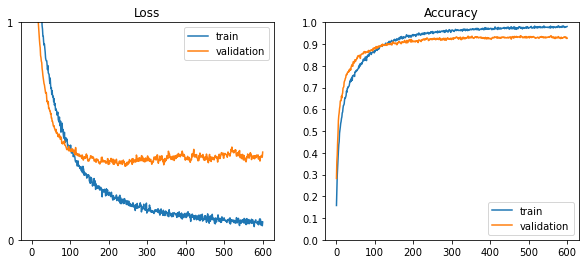

In [136]:
NetworksPlotUtils.plot_models_loss_acc_history(base_model_history, 
                                               min_loss=0, max_loss=1, 
                                               step_loss=1, step_acc=0.1,
                                               min_acc=0, max_acc=1)

- We will set the epochs to 300

In [138]:
droupout_value=0.2

## with less units
base_model = K.models.Sequential()
base_model.add(input_normalization_layer)
base_model.add(K.layers.Dense(256*0.75, activation='relu', input_shape=(data.shape[1],)))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(128*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(64*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(64*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(32*0.75, activation='relu'))
base_model.add(K.layers.Dropout(droupout_value))
base_model.add(K.layers.Dense(labels.shape[1], activation='softmax'))

base_model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

base_model.fit(np.concatenate((x_train,x_val)), 
                                    np.concatenate((y_train, y_val)), 
                                    batch_size=512, 
                                    epochs = 450,
                                    validation_data=(x_test, y_test)) 

Epoch 1/450
9/9 [==============================] - 0s 44ms/step - loss: 2.2504 - accuracy: 0.1391 - val_loss: 2.0807 - val_accuracy: 0.3284
Epoch 2/450
9/9 [==============================] - 0s 14ms/step - loss: 2.0847 - accuracy: 0.2449 - val_loss: 1.8513 - val_accuracy: 0.4167
Epoch 3/450
9/9 [==============================] - 0s 15ms/step - loss: 1.9381 - accuracy: 0.3169 - val_loss: 1.6712 - val_accuracy: 0.4545
Epoch 4/450
9/9 [==============================] - 0s 16ms/step - loss: 1.8079 - accuracy: 0.3774 - val_loss: 1.5428 - val_accuracy: 0.5069
Epoch 5/450
9/9 [==============================] - 0s 19ms/step - loss: 1.7193 - accuracy: 0.4059 - val_loss: 1.4457 - val_accuracy: 0.5271
Epoch 6/450
9/9 [==============================] - 0s 16ms/step - loss: 1.6514 - accuracy: 0.4347 - val_loss: 1.3491 - val_accuracy: 0.5483
Epoch 7/450
9/9 [==============================] - 0s 19ms/step - loss: 1.5720 - accuracy: 0.4657 - val_loss: 1.2919 - val_accuracy: 0.5869
Epoch 8/450
9/9 [===

9/9 [==============================] - 0s 19ms/step - loss: 0.3338 - accuracy: 0.8995 - val_loss: 0.3942 - val_accuracy: 0.8979
Epoch 118/450
9/9 [==============================] - 0s 18ms/step - loss: 0.3508 - accuracy: 0.8937 - val_loss: 0.3952 - val_accuracy: 0.8951
Epoch 119/450
9/9 [==============================] - 0s 19ms/step - loss: 0.3357 - accuracy: 0.9011 - val_loss: 0.3907 - val_accuracy: 0.8960
Epoch 120/450
9/9 [==============================] - 0s 19ms/step - loss: 0.3360 - accuracy: 0.8970 - val_loss: 0.3983 - val_accuracy: 0.8960
Epoch 121/450
9/9 [==============================] - 0s 17ms/step - loss: 0.3451 - accuracy: 0.8924 - val_loss: 0.3948 - val_accuracy: 0.8997
Epoch 122/450
9/9 [==============================] - 0s 17ms/step - loss: 0.3396 - accuracy: 0.8974 - val_loss: 0.3769 - val_accuracy: 0.9071
Epoch 123/450
9/9 [==============================] - 0s 15ms/step - loss: 0.3260 - accuracy: 0.8979 - val_loss: 0.3794 - val_accuracy: 0.9034
Epoch 124/450
9/9 [=

Epoch 175/450
9/9 [==============================] - 0s 19ms/step - loss: 0.2348 - accuracy: 0.9289 - val_loss: 0.3410 - val_accuracy: 0.9144
Epoch 176/450
9/9 [==============================] - 0s 19ms/step - loss: 0.2369 - accuracy: 0.9354 - val_loss: 0.3395 - val_accuracy: 0.9154
Epoch 177/450
9/9 [==============================] - 0s 17ms/step - loss: 0.2092 - accuracy: 0.9414 - val_loss: 0.3437 - val_accuracy: 0.9089
Epoch 178/450
9/9 [==============================] - 0s 16ms/step - loss: 0.2365 - accuracy: 0.9305 - val_loss: 0.3457 - val_accuracy: 0.9172
Epoch 179/450
9/9 [==============================] - 0s 16ms/step - loss: 0.2310 - accuracy: 0.9349 - val_loss: 0.3388 - val_accuracy: 0.9126
Epoch 180/450
9/9 [==============================] - 0s 21ms/step - loss: 0.2208 - accuracy: 0.9351 - val_loss: 0.3408 - val_accuracy: 0.9218
Epoch 181/450
9/9 [==============================] - 0s 23ms/step - loss: 0.2193 - accuracy: 0.9374 - val_loss: 0.3435 - val_accuracy: 0.9172
Epoch 

Epoch 233/450
9/9 [==============================] - 0s 27ms/step - loss: 0.1692 - accuracy: 0.9515 - val_loss: 0.3647 - val_accuracy: 0.9172
Epoch 234/450
9/9 [==============================] - 0s 21ms/step - loss: 0.1660 - accuracy: 0.9529 - val_loss: 0.3450 - val_accuracy: 0.9181
Epoch 235/450
9/9 [==============================] - 0s 21ms/step - loss: 0.1608 - accuracy: 0.9540 - val_loss: 0.3586 - val_accuracy: 0.9190
Epoch 236/450
9/9 [==============================] - 0s 27ms/step - loss: 0.1668 - accuracy: 0.9535 - val_loss: 0.3500 - val_accuracy: 0.9190
Epoch 237/450
9/9 [==============================] - 0s 23ms/step - loss: 0.1726 - accuracy: 0.9545 - val_loss: 0.3630 - val_accuracy: 0.9200
Epoch 238/450
9/9 [==============================] - 0s 19ms/step - loss: 0.1767 - accuracy: 0.9499 - val_loss: 0.3668 - val_accuracy: 0.9190
Epoch 239/450
9/9 [==============================] - 0s 22ms/step - loss: 0.1640 - accuracy: 0.9512 - val_loss: 0.3566 - val_accuracy: 0.9246
Epoch 

Epoch 291/450
9/9 [==============================] - 0s 20ms/step - loss: 0.1432 - accuracy: 0.9600 - val_loss: 0.3637 - val_accuracy: 0.9209
Epoch 292/450
9/9 [==============================] - 0s 17ms/step - loss: 0.1323 - accuracy: 0.9616 - val_loss: 0.3464 - val_accuracy: 0.9227
Epoch 293/450
9/9 [==============================] - 0s 16ms/step - loss: 0.1399 - accuracy: 0.9637 - val_loss: 0.3538 - val_accuracy: 0.9209
Epoch 294/450
9/9 [==============================] - 0s 23ms/step - loss: 0.1418 - accuracy: 0.9609 - val_loss: 0.3470 - val_accuracy: 0.9236
Epoch 295/450
9/9 [==============================] - 0s 21ms/step - loss: 0.1276 - accuracy: 0.9641 - val_loss: 0.3568 - val_accuracy: 0.9255
Epoch 296/450
9/9 [==============================] - 0s 30ms/step - loss: 0.1449 - accuracy: 0.9616 - val_loss: 0.3549 - val_accuracy: 0.9264
Epoch 297/450
9/9 [==============================] - 0s 22ms/step - loss: 0.1349 - accuracy: 0.9630 - val_loss: 0.3594 - val_accuracy: 0.9190
Epoch 

Epoch 349/450
9/9 [==============================] - 0s 22ms/step - loss: 0.1168 - accuracy: 0.9706 - val_loss: 0.3808 - val_accuracy: 0.9255
Epoch 350/450
9/9 [==============================] - 0s 24ms/step - loss: 0.1280 - accuracy: 0.9673 - val_loss: 0.3788 - val_accuracy: 0.9255
Epoch 351/450
9/9 [==============================] - 0s 26ms/step - loss: 0.1246 - accuracy: 0.9662 - val_loss: 0.3462 - val_accuracy: 0.9282
Epoch 352/450
9/9 [==============================] - 0s 25ms/step - loss: 0.1149 - accuracy: 0.9692 - val_loss: 0.3592 - val_accuracy: 0.9292
Epoch 353/450
9/9 [==============================] - 0s 26ms/step - loss: 0.1182 - accuracy: 0.9708 - val_loss: 0.3571 - val_accuracy: 0.9236
Epoch 354/450
9/9 [==============================] - 0s 20ms/step - loss: 0.1093 - accuracy: 0.9694 - val_loss: 0.3602 - val_accuracy: 0.9282
Epoch 355/450
9/9 [==============================] - 0s 33ms/step - loss: 0.1115 - accuracy: 0.9696 - val_loss: 0.3677 - val_accuracy: 0.9282
Epoch 

Epoch 407/450
9/9 [==============================] - 0s 24ms/step - loss: 0.1017 - accuracy: 0.9752 - val_loss: 0.3961 - val_accuracy: 0.9246
Epoch 408/450
9/9 [==============================] - 0s 18ms/step - loss: 0.0984 - accuracy: 0.9719 - val_loss: 0.3845 - val_accuracy: 0.9255
Epoch 409/450
9/9 [==============================] - 0s 24ms/step - loss: 0.0969 - accuracy: 0.9772 - val_loss: 0.3785 - val_accuracy: 0.9246
Epoch 410/450
9/9 [==============================] - 0s 27ms/step - loss: 0.0942 - accuracy: 0.9759 - val_loss: 0.3894 - val_accuracy: 0.9255
Epoch 411/450
9/9 [==============================] - 0s 23ms/step - loss: 0.0920 - accuracy: 0.9745 - val_loss: 0.3816 - val_accuracy: 0.9236
Epoch 412/450
9/9 [==============================] - 0s 21ms/step - loss: 0.1133 - accuracy: 0.9717 - val_loss: 0.3900 - val_accuracy: 0.9218
Epoch 413/450
9/9 [==============================] - 0s 19ms/step - loss: 0.1098 - accuracy: 0.9710 - val_loss: 0.3775 - val_accuracy: 0.9236
Epoch 

In [142]:
test_loss, test_accuracy = base_model.evaluate(x_test, y_test, batch_size=512)

3/3 [==============================] - 0s 6ms/step - loss: 0.3796 - accuracy: 0.9273


In [143]:
print("Model performance")
print("- Test Loss {0:.3f}".format(test_loss)) 
print("- Test Accuracy  {0:.3f}".format(test_accuracy))

Model performance
- Test Loss 0.380
- Test Accuracy  0.927


##### Save the model

In [144]:
base_model.save("./models.repo/model.fully.connected.network.h5")
pickle.dump( labelEncoder, open( "./pickle.repo/model.fully.connected.network.label.encoder.pickle", "wb" ) )